In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
plt.style.use("seaborn")
import warnings
warnings.filterwarnings('ignore')

<ipython-input-1-dafeffcf66fa>:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn")


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, explained_variance_score, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
seed = 44

In [ ]:
df = pd.read_csv(r"/content/drive/MyDrive/csv/sub3.csv")
df

ATS7i      AATS5m    AATS4p    AATS5p      AATS3i    AATS1s  \
0     4816.361052   86.895718  1.531829  1.500766  152.814519  3.400277   
1     9554.202929   88.027865  1.621588  1.624751  153.315880  3.392603   
2     7458.950110   69.378896  1.532961  1.523305  147.985839  3.330247   
3     7458.950110   69.378896  1.532961  1.523305  147.985839  3.330247   
4     4816.361052   86.895718  1.531829  1.500766  152.814519  3.400277   
..            ...         ...       ...       ...         ...       ...   
471   9413.246639   84.031000  1.604841  1.534315  147.277685  3.357459   
472  15167.504920   67.346399  1.409479  1.381718  153.363438  2.912932   
473  16149.885300   73.034024  1.663769  1.509584  145.432464  3.273020   
474  13048.440510   49.560309  1.357265  1.275635  153.614338  2.933128   
475   8176.890487  106.522961  1.838018  1.644447  144.974817  2.967078   

       AATS5s      ATSC7m     ATSC1v    ATSC7e  ...   maxsCH3      hmax  \
0    3.472771 -489.586289  52.150850 -0.261261  ...  0.000000  0.589120   
1    3.242769  -86.770734  47.745177 -0.348365  ...  0.000000  0.601573   
2    3.281987 -463.476314  67.220002 -0.488077  ...  0.000000  0.644444   
3    3.281987 -463.476314  67.220002 -0.488077  ...  0.000000  0.644444   
4    3.472771 -489.586289  52.150850 -0.261261  ...  0.000000  0.589120   
..        ...         ...        ...       ...  ...       ...       ...   
471  3.188195  140.478615  30.495258  0.765467  ...  1.645778  0.652545   
472  2.524406 -786.239002   6.700541  0.238570  ...  2.167870  0.626328   
473  2.859500  714.501999 -26.804638 -0.006049  ...  1.617186  0.665167   
474  2.482906 -370.612827  16.536015 -0.516473  ...  2.158612  0.635995   
475  5.547276 -196.621419  89.861373 -0.396791  ...  0.000000  1.491315   

     MLFER_BO  MLFER_S  nTG12HeteroRing      GGI6      JGI4      SRW8  XLogP  \
0       1.389    2.233                0  0.201633  0.049495  8.186743  4.364   
1       1.593    2.793                0  0.382041  0.049778  8.559294  6.010   
2       0.913    2.179                1  0.327347  0.040717  8.435766  6.965   
3       0.913    2.179                1  0.327347  0.040717  8.435766  6.965   
4       1.389    2.233                0  0.201633  0.049495  8.186743  4.364   
..        ...      ...              ...       ...       ...       ...    ...   
471     1.082    2.435                1  0.449796  0.050643  8.570734  5.984   
472     1.849    2.868                1  0.568980  0.045797  8.769507  5.670   
473     0.866    3.546                1  0.528163  0.050118  8.690306  5.251   
474     1.894    2.773                1  0.647347  0.037989  8.724695  5.574   
475     1.249    3.510                1  0.548571  0.057185  8.701346  5.187   

        pIC50  
0    8.522879  
1    8.397940  
2    8.397940  
3    8.000000  
4    7.602060  
..        ...  
471  6.000000  
472  6.000000  
473  6.000000  
474  6.000000  
475  6.000000  

[476 rows x 51 columns]

In [ ]:
print(df.columns)

Index(['ATS7i', 'AATS5m', 'AATS4p', 'AATS5p', 'AATS3i', 'AATS1s', 'AATS5s',
       'ATSC7m', 'ATSC1v', 'ATSC7e', 'ATSC5s', 'AATSC0s', 'AATSC6s', 'MATS8c',
       'MATS3e', 'MATS5i', 'GATS3c', 'GATS4m', 'GATS3v', 'GATS5e', 'SpMAD_Dzp',
       'VR2_Dzs', 'BCUTc-1l', 'SpMax7_Bhm', 'SpMax6_Bhv', 'SpMin2_Bhv',
       'SpMin1_Bhe', 'SpMax1_Bhp', 'SpMin2_Bhs', 'VCH-6', 'VPC-5', 'ASP-3',
       'ASP-4', 'ASP-6', 'ASP-7', 'SHBd', 'SHdsCH', 'minHdsCH', 'minsCH3',
       'mindssC', 'maxHdsCH', 'maxsCH3', 'hmax', 'MLFER_BO', 'MLFER_S',
       'nTG12HeteroRing', 'GGI6', 'JGI4', 'SRW8', 'XLogP', 'pIC50'],
      dtype='object')


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 51 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ATS7i            476 non-null    float64
 1   AATS5m           476 non-null    float64
 2   AATS4p           476 non-null    float64
 3   AATS5p           476 non-null    float64
 4   AATS3i           476 non-null    float64
 5   AATS1s           476 non-null    float64
 6   AATS5s           476 non-null    float64
 7   ATSC7m           476 non-null    float64
 8   ATSC1v           476 non-null    float64
 9   ATSC7e           476 non-null    float64
 10  ATSC5s           476 non-null    float64
 11  AATSC0s          476 non-null    float64
 12  AATSC6s          476 non-null    float64
 13  MATS8c           476 non-null    float64
 14  MATS3e           476 non-null    float64
 15  MATS5i           476 non-null    float64
 16  GATS3c           476 non-null    float64
 17  GATS4m          

In [ ]:
df.isnull()

ATS7i  AATS5m  AATS4p  AATS5p  AATS3i  AATS1s  AATS5s  ATSC7m  ATSC1v  \
0    False   False   False   False   False   False   False   False   False   
1    False   False   False   False   False   False   False   False   False   
2    False   False   False   False   False   False   False   False   False   
3    False   False   False   False   False   False   False   False   False   
4    False   False   False   False   False   False   False   False   False   
..     ...     ...     ...     ...     ...     ...     ...     ...     ...   
471  False   False   False   False   False   False   False   False   False   
472  False   False   False   False   False   False   False   False   False   
473  False   False   False   False   False   False   False   False   False   
474  False   False   False   False   False   False   False   False   False   
475  False   False   False   False   False   False   False   False   False   

     ATSC7e  ...  maxsCH3   hmax  MLFER_BO  MLFER_S  nTG12HeteroRing   GGI6  \
0     False  ...    False  False     False    False            False  False   
1     False  ...    False  False     False    False            False  False   
2     False  ...    False  False     False    False            False  False   
3     False  ...    False  False     False    False            False  False   
4     False  ...    False  False     False    False            False  False   
..      ...  ...      ...    ...       ...      ...              ...    ...   
471   False  ...    False  False     False    False            False  False   
472   False  ...    False  False     False    False            False  False   
473   False  ...    False  False     False    False            False  False   
474   False  ...    False  False     False    False            False  False   
475   False  ...    False  False     False    False            False  False   

      JGI4   SRW8  XLogP  pIC50  
0    False  False  False  False  
1    False  False  False  False  
2    False  False  False  False  
3    False  False  False  False  
4    False  False  False  False  
..     ...    ...    ...    ...  
471  False  False  False  False  
472  False  False  False  False  
473  False  False  False  False  
474  False  False  False  False  
475  False  False  False  False  

[476 rows x 51 columns]

In [ ]:
df.isnull().sum()

ATS7i              0
AATS5m             0
AATS4p             0
AATS5p             0
AATS3i             0
AATS1s             0
AATS5s             0
ATSC7m             0
ATSC1v             0
ATSC7e             0
ATSC5s             0
AATSC0s            0
AATSC6s            0
MATS8c             0
MATS3e             0
MATS5i             0
GATS3c             0
GATS4m             0
GATS3v             0
GATS5e             0
SpMAD_Dzp          0
VR2_Dzs            0
BCUTc-1l           0
SpMax7_Bhm         0
SpMax6_Bhv         0
SpMin2_Bhv         0
SpMin1_Bhe         0
SpMax1_Bhp         0
SpMin2_Bhs         0
VCH-6              0
VPC-5              0
ASP-3              0
ASP-4              0
ASP-6              0
ASP-7              0
SHBd               0
SHdsCH             0
minHdsCH           0
minsCH3            0
mindssC            0
maxHdsCH           0
maxsCH3            0
hmax               0
MLFER_BO           0
MLFER_S            0
nTG12HeteroRing    0
GGI6               0
JGI4         

In [ ]:
df.isnull().sum().sum()

0

In [ ]:
df2 = df.fillna(value = 0)
df2

ATS7i      AATS5m    AATS4p    AATS5p      AATS3i    AATS1s  \
0     4816.361052   86.895718  1.531829  1.500766  152.814519  3.400277   
1     9554.202929   88.027865  1.621588  1.624751  153.315880  3.392603   
2     7458.950110   69.378896  1.532961  1.523305  147.985839  3.330247   
3     7458.950110   69.378896  1.532961  1.523305  147.985839  3.330247   
4     4816.361052   86.895718  1.531829  1.500766  152.814519  3.400277   
..            ...         ...       ...       ...         ...       ...   
471   9413.246639   84.031000  1.604841  1.534315  147.277685  3.357459   
472  15167.504920   67.346399  1.409479  1.381718  153.363438  2.912932   
473  16149.885300   73.034024  1.663769  1.509584  145.432464  3.273020   
474  13048.440510   49.560309  1.357265  1.275635  153.614338  2.933128   
475   8176.890487  106.522961  1.838018  1.644447  144.974817  2.967078   

       AATS5s      ATSC7m     ATSC1v    ATSC7e  ...   maxsCH3      hmax  \
0    3.472771 -489.586289  52.150850 -0.261261  ...  0.000000  0.589120   
1    3.242769  -86.770734  47.745177 -0.348365  ...  0.000000  0.601573   
2    3.281987 -463.476314  67.220002 -0.488077  ...  0.000000  0.644444   
3    3.281987 -463.476314  67.220002 -0.488077  ...  0.000000  0.644444   
4    3.472771 -489.586289  52.150850 -0.261261  ...  0.000000  0.589120   
..        ...         ...        ...       ...  ...       ...       ...   
471  3.188195  140.478615  30.495258  0.765467  ...  1.645778  0.652545   
472  2.524406 -786.239002   6.700541  0.238570  ...  2.167870  0.626328   
473  2.859500  714.501999 -26.804638 -0.006049  ...  1.617186  0.665167   
474  2.482906 -370.612827  16.536015 -0.516473  ...  2.158612  0.635995   
475  5.547276 -196.621419  89.861373 -0.396791  ...  0.000000  1.491315   

     MLFER_BO  MLFER_S  nTG12HeteroRing      GGI6      JGI4      SRW8  XLogP  \
0       1.389    2.233                0  0.201633  0.049495  8.186743  4.364   
1       1.593    2.793                0  0.382041  0.049778  8.559294  6.010   
2       0.913    2.179                1  0.327347  0.040717  8.435766  6.965   
3       0.913    2.179                1  0.327347  0.040717  8.435766  6.965   
4       1.389    2.233                0  0.201633  0.049495  8.186743  4.364   
..        ...      ...              ...       ...       ...       ...    ...   
471     1.082    2.435                1  0.449796  0.050643  8.570734  5.984   
472     1.849    2.868                1  0.568980  0.045797  8.769507  5.670   
473     0.866    3.546                1  0.528163  0.050118  8.690306  5.251   
474     1.894    2.773                1  0.647347  0.037989  8.724695  5.574   
475     1.249    3.510                1  0.548571  0.057185  8.701346  5.187   

        pIC50  
0    8.522879  
1    8.397940  
2    8.397940  
3    8.000000  
4    7.602060  
..        ...  
471  6.000000  
472  6.000000  
473  6.000000  
474  6.000000  
475  6.000000  

[476 rows x 51 columns]

In [ ]:
df2.isnull().sum().sum()

0

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 476 entries, 0 to 475
Data columns (total 51 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ATS7i            476 non-null    float64
 1   AATS5m           476 non-null    float64
 2   AATS4p           476 non-null    float64
 3   AATS5p           476 non-null    float64
 4   AATS3i           476 non-null    float64
 5   AATS1s           476 non-null    float64
 6   AATS5s           476 non-null    float64
 7   ATSC7m           476 non-null    float64
 8   ATSC1v           476 non-null    float64
 9   ATSC7e           476 non-null    float64
 10  ATSC5s           476 non-null    float64
 11  AATSC0s          476 non-null    float64
 12  AATSC6s          476 non-null    float64
 13  MATS8c           476 non-null    float64
 14  MATS3e           476 non-null    float64
 15  MATS5i           476 non-null    float64
 16  GATS3c           476 non-null    float64
 17  GATS4m          

In [ ]:
df2.describe()

ATS7i      AATS5m      AATS4p      AATS5p      AATS3i  \
count    476.000000  476.000000  476.000000  476.000000  476.000000   
mean    8335.602996   68.149551    1.474082    1.425124  150.362112   
std     2813.712016   14.342296    0.149062    0.151455    2.802391   
min     4519.221401   24.855475    1.185193    0.969463  144.093921   
25%     6441.948682   56.579268    1.364632    1.305390  148.314194   
50%     7458.950110   65.769516    1.433966    1.382633  150.574098   
75%     9445.124258   77.288676    1.534327    1.523305  152.287906   
max    18166.991280  117.144080    2.029633    1.855522  159.551914   

           AATS1s      AATS5s       ATSC7m      ATSC1v      ATSC7e  ...  \
count  476.000000  476.000000   476.000000  476.000000  476.000000  ...   
mean     3.500779    3.351720  -192.036540   57.673043   -0.169652  ...   
std      0.387025    0.594154   372.881785   73.114966    0.679278  ...   
min      2.226035    1.883140 -1063.980638 -111.368432   -2.648219  ...   
25%      3.330159    3.024130  -463.159102   19.589163   -0.519897  ...   
50%      3.400277    3.281987  -196.621419   53.174925   -0.253746  ...   
75%      3.676190    3.490345    10.920161   82.502255    0.075509  ...   
max      4.807190    5.604974  1078.427430  301.334565    2.584567  ...   

          maxsCH3        hmax    MLFER_BO     MLFER_S  nTG12HeteroRing  \
count  476.000000  476.000000  476.000000  476.000000       476.000000   
mean     0.551120    0.674190    1.118903    2.343744         0.466387   
std      0.772896    0.136663    0.286860    0.348820         0.708538   
min      0.000000    0.493810    0.556000    0.993000         0.000000   
25%      0.000000    0.606507    0.901000    2.065000         0.000000   
50%      0.000000    0.644444    1.072000    2.316000         0.000000   
75%      1.522005    0.679167    1.250750    2.556000         1.000000   
max      2.459505    1.491315    1.894000    3.546000         6.000000   

             GGI6        JGI4        SRW8       XLogP       pIC50  
count  476.000000  476.000000  476.000000  476.000000  476.000000  
mean     0.361629    0.043602    8.349364    4.767200    6.447786  
std      0.138150    0.007091    0.250527    1.985913    1.227109  
min      0.142857    0.020185    7.717351    0.363000    3.392545  
25%      0.262041    0.040384    8.186046    3.096250    5.356547  
50%      0.345306    0.043088    8.435766    5.260000    6.594353  
75%      0.445714    0.047565    8.517393    6.408000    7.426087  
max      0.827755    0.060952    8.769507    8.841000    9.309804  

[8 rows x 51 columns]

In [ ]:
df2.head()

ATS7i     AATS5m    AATS4p    AATS5p      AATS3i    AATS1s    AATS5s  \
0  4816.361052  86.895718  1.531829  1.500766  152.814519  3.400277  3.472771   
1  9554.202929  88.027865  1.621588  1.624751  153.315880  3.392603  3.242769   
2  7458.950110  69.378896  1.532961  1.523305  147.985839  3.330247  3.281987   
3  7458.950110  69.378896  1.532961  1.523305  147.985839  3.330247  3.281987   
4  4816.361052  86.895718  1.531829  1.500766  152.814519  3.400277  3.472771   

       ATSC7m     ATSC1v    ATSC7e  ...  maxsCH3      hmax  MLFER_BO  MLFER_S  \
0 -489.586289  52.150850 -0.261261  ...      0.0  0.589120     1.389    2.233   
1  -86.770734  47.745177 -0.348365  ...      0.0  0.601573     1.593    2.793   
2 -463.476314  67.220002 -0.488077  ...      0.0  0.644444     0.913    2.179   
3 -463.476314  67.220002 -0.488077  ...      0.0  0.644444     0.913    2.179   
4 -489.586289  52.150850 -0.261261  ...      0.0  0.589120     1.389    2.233   

   nTG12HeteroRing      GGI6      JGI4      SRW8  XLogP     pIC50  
0                0  0.201633  0.049495  8.186743  4.364  8.522879  
1                0  0.382041  0.049778  8.559294  6.010  8.397940  
2                1  0.327347  0.040717  8.435766  6.965  8.397940  
3                1  0.327347  0.040717  8.435766  6.965  8.000000  
4                0  0.201633  0.049495  8.186743  4.364  7.602060  

[5 rows x 51 columns]

In [ ]:
df2.describe().T

count         mean          std          min          25%  \
ATS7i            476.0  8335.602996  2813.712016  4519.221401  6441.948682   
AATS5m           476.0    68.149551    14.342296    24.855475    56.579268   
AATS4p           476.0     1.474082     0.149062     1.185193     1.364632   
AATS5p           476.0     1.425124     0.151455     0.969463     1.305390   
AATS3i           476.0   150.362112     2.802391   144.093921   148.314194   
AATS1s           476.0     3.500779     0.387025     2.226035     3.330159   
AATS5s           476.0     3.351720     0.594154     1.883140     3.024130   
ATSC7m           476.0  -192.036540   372.881785 -1063.980638  -463.159102   
ATSC1v           476.0    57.673043    73.114966  -111.368432    19.589163   
ATSC7e           476.0    -0.169652     0.679278    -2.648219    -0.519897   
ATSC5s           476.0    -6.875210    14.453761   -49.136553   -11.810764   
AATSC0s          476.0     1.538091     0.718091     0.288463     1.129047   
AATSC6s          476.0    -0.065057     0.203250    -0.860145    -0.158054   
MATS8c           476.0     0.008767     0.105472    -0.247188    -0.039516   
MATS3e           476.0    -0.051728     0.071422    -0.225799    -0.093858   
MATS5i           476.0     0.045995     0.075220    -0.109039     0.006935   
GATS3c           476.0     1.082593     0.164591     0.756675     0.955050   
GATS4m           476.0     1.047370     0.117224     0.642836     0.979379   
GATS3v           476.0     0.990697     0.064236     0.858235     0.938474   
GATS5e           476.0     1.180922     0.233477     0.689950     1.001294   
SpMAD_Dzp        476.0     8.901706     1.580440     5.976909     7.984068   
VR2_Dzs          476.0    19.962890    38.008967     6.221887     8.349557   
BCUTc-1l         476.0    -0.346354     0.034869    -0.400995    -0.374440   
SpMax7_Bhm       476.0     2.669396     0.138438     2.310967     2.566822   
SpMax6_Bhv       476.0     2.730100     0.108786     2.511581     2.646700   
SpMin2_Bhv       476.0     1.917628     0.028960     1.840298     1.891047   
SpMin1_Bhe       476.0     1.991614     0.079954     1.876075     1.931117   
SpMax1_Bhp       476.0     3.961881     0.090650     3.832744     3.885259   
SpMin2_Bhs       476.0     1.846130     0.058853     1.749750     1.799662   
VCH-6            476.0     0.084191     0.031397     0.045679     0.062849   
VPC-5            476.0     1.547197     0.751619     0.462043     1.073348   
ASP-3            476.0     0.181139     0.012343     0.160498     0.171571   
ASP-4            476.0     0.116903     0.009760     0.097617     0.109393   
ASP-6            476.0     0.048498     0.006089     0.038016     0.043745   
ASP-7            476.0     0.031420     0.004662     0.023447     0.028036   
SHBd             476.0     0.378719     0.664230     0.000000     0.000000   
SHdsCH           476.0     0.655729     0.420818     0.000000     0.508403   
minHdsCH         476.0     0.457832     0.251610     0.000000     0.501440   
minsCH3          476.0     0.547348     0.766381     0.000000     0.000000   
mindssC          476.0    -0.055038     0.293546    -0.887671    -0.149761   
maxHdsCH         476.0     0.473330     0.257337     0.000000     0.508403   
maxsCH3          476.0     0.551120     0.772896     0.000000     0.000000   
hmax             476.0     0.674190     0.136663     0.493810     0.606507   
MLFER_BO         476.0     1.118903     0.286860     0.556000     0.901000   
MLFER_S          476.0     2.343744     0.348820     0.993000     2.065000   
nTG12HeteroRing  476.0     0.466387     0.708538     0.000000     0.000000   
GGI6             476.0     0.361629     0.138150     0.142857     0.262041   
JGI4             476.0     0.043602     0.007091     0.020185     0.040384   
SRW8             476.0     8.349364     0.250527     7.717351     8.186046   
XLogP            476.0     4.767200     1.985913     0.363000     3.096250   
pIC50            476.0     6.447786    

In [ ]:
X = df2.drop(['pIC50'],axis = 1)
X

ATS7i      AATS5m    AATS4p    AATS5p      AATS3i    AATS1s  \
0     4816.361052   86.895718  1.531829  1.500766  152.814519  3.400277   
1     9554.202929   88.027865  1.621588  1.624751  153.315880  3.392603   
2     7458.950110   69.378896  1.532961  1.523305  147.985839  3.330247   
3     7458.950110   69.378896  1.532961  1.523305  147.985839  3.330247   
4     4816.361052   86.895718  1.531829  1.500766  152.814519  3.400277   
..            ...         ...       ...       ...         ...       ...   
471   9413.246639   84.031000  1.604841  1.534315  147.277685  3.357459   
472  15167.504920   67.346399  1.409479  1.381718  153.363438  2.912932   
473  16149.885300   73.034024  1.663769  1.509584  145.432464  3.273020   
474  13048.440510   49.560309  1.357265  1.275635  153.614338  2.933128   
475   8176.890487  106.522961  1.838018  1.644447  144.974817  2.967078   

       AATS5s      ATSC7m     ATSC1v    ATSC7e  ...  maxHdsCH   maxsCH3  \
0    3.472771 -489.586289  52.150850 -0.261261  ...  0.000000  0.000000   
1    3.242769  -86.770734  47.745177 -0.348365  ...  0.000000  0.000000   
2    3.281987 -463.476314  67.220002 -0.488077  ...  0.644444  0.000000   
3    3.281987 -463.476314  67.220002 -0.488077  ...  0.644444  0.000000   
4    3.472771 -489.586289  52.150850 -0.261261  ...  0.000000  0.000000   
..        ...         ...        ...       ...  ...       ...       ...   
471  3.188195  140.478615  30.495258  0.765467  ...  0.652545  1.645778   
472  2.524406 -786.239002   6.700541  0.238570  ...  0.626328  2.167870   
473  2.859500  714.501999 -26.804638 -0.006049  ...  0.544303  1.617186   
474  2.482906 -370.612827  16.536015 -0.516473  ...  0.635995  2.158612   
475  5.547276 -196.621419  89.861373 -0.396791  ...  0.609551  0.000000   

         hmax  MLFER_BO  MLFER_S  nTG12HeteroRing      GGI6      JGI4  \
0    0.589120     1.389    2.233                0  0.201633  0.049495   
1    0.601573     1.593    2.793                0  0.382041  0.049778   
2    0.644444     0.913    2.179                1  0.327347  0.040717   
3    0.644444     0.913    2.179                1  0.327347  0.040717   
4    0.589120     1.389    2.233                0  0.201633  0.049495   
..        ...       ...      ...              ...       ...       ...   
471  0.652545     1.082    2.435                1  0.449796  0.050643   
472  0.626328     1.849    2.868                1  0.568980  0.045797   
473  0.665167     0.866    3.546                1  0.528163  0.050118   
474  0.635995     1.894    2.773                1  0.647347  0.037989   
475  1.491315     1.249    3.510                1  0.548571  0.057185   

         SRW8  XLogP  
0    8.186743  4.364  
1    8.559294  6.010  
2    8.435766  6.965  
3    8.435766  6.965  
4    8.186743  4.364  
..        ...    ...  
471  8.570734  5.984  
472  8.769507  5.670  
473  8.690306  5.251  
474  8.724695  5.574  
475  8.701346  5.187  

[476 rows x 50 columns]

In [ ]:
Y = df2.pIC50
Y

0      8.522879
1      8.397940
2      8.397940
3      8.000000
4      7.602060
         ...   
471    6.000000
472    6.000000
473    6.000000
474    6.000000
475    6.000000
Name: pIC50, Length: 476, dtype: float64

In [ ]:
X.shape

(476, 50)

In [ ]:
Y.shape

(476,)

In [ ]:
corr = df2.corr()

In [ ]:
corr

ATS7i    AATS5m    AATS4p    AATS5p    AATS3i    AATS1s  \
ATS7i            1.000000 -0.243495  0.001727 -0.159036  0.011917 -0.315395   
AATS5m          -0.243495  1.000000  0.675076  0.772838 -0.328234  0.019116   
AATS4p           0.001727  0.675076  1.000000  0.917546 -0.729109 -0.402823   
AATS5p          -0.159036  0.772838  0.917546  1.000000 -0.587826 -0.360117   
AATS3i           0.011917 -0.328234 -0.729109 -0.587826  1.000000  0.276542   
AATS1s          -0.315395  0.019116 -0.402823 -0.360117  0.276542  1.000000   
AATS5s          -0.296147  0.338601 -0.106004 -0.102302  0.067409  0.730276   
ATSC7m           0.026818 -0.207572 -0.177691 -0.322134 -0.025280  0.291521   
ATSC1v          -0.097309  0.151154 -0.047952  0.015822 -0.000889  0.398334   
ATSC7e          -0.167341 -0.041161 -0.135632 -0.143938  0.018672  0.217443   
ATSC5s           0.030148  0.136751  0.428541  0.387291 -0.336435 -0.627791   
AATSC0s         -0.175070  0.061372 -0.361764 -0.319196  0.397835  0.752995   
AATSC6s          0.009242 -0.097376  0.019967 -0.042816 -0.139515  0.222406   
MATS8c           0.254242 -0.202783  0.008041 -0.059319  0.158662 -0.247392   
MATS3e           0.272611 -0.167744  0.033857 -0.048783 -0.132863 -0.212278   
MATS5i          -0.006697  0.192812  0.010204  0.185439  0.235830 -0.075996   
GATS3c           0.153132  0.216110  0.213622  0.312654  0.047536 -0.139029   
GATS4m          -0.107993 -0.335737  0.105845 -0.000822 -0.087669 -0.209944   
GATS3v          -0.343443 -0.330854 -0.641158 -0.565288  0.468775  0.225042   
GATS5e           0.006682  0.074939  0.086575  0.122793 -0.222810 -0.155174   
SpMAD_Dzp        0.633988 -0.214788 -0.288017 -0.284320  0.463703  0.163794   
VR2_Dzs         -0.030877 -0.053310  0.082770 -0.008770 -0.103488 -0.049771   
BCUTc-1l        -0.240911  0.311316  0.403240  0.487345 -0.230121 -0.521374   
SpMax7_Bhm       0.709592  0.210176  0.399194  0.329232 -0.163174 -0.305747   
SpMax6_Bhv       0.720447  0.029565  0.378550  0.283721 -0.277361 -0.385050   
SpMin2_Bhv       0.513371  0.052194  0.333384  0.345947 -0.238333 -0.458461   
SpMin1_Bhe       0.382293  0.146075  0.547780  0.501271 -0.565704 -0.501865   
SpMax1_Bhp       0.347015  0.225661  0.613348  0.547484 -0.607729 -0.514188   
SpMin2_Bhs       0.454844  0.183743  0.409779  0.442797 -0.192516 -0.610643   
VCH-6            0.524046 -0.074121  0.202837  0.183338 -0.034247 -0.616508   
VPC-5            0.583730  0.136427  0.405781  0.270588 -0.233033 -0.464854   
ASP-3           -0.439649 -0.247166 -0.422838 -0.352524  0.302874  0.106767   
ASP-4           -0.451753 -0.277543 -0.455502 -0.387809  0.316708  0.153575   
ASP-6           -0.435552 -0.259382 -0.419562 -0.350866  0.301806  0.091833   
ASP-7           -0.409504 -0.272908 -0.380900 -0.321373  0.244255  0.019812   
SHBd            -0.166620  0.005996 -0.363766 -0.345814  0.280051  0.795381   
SHdsCH          -0.074318 -0.250068 -0.066390 -0.083949 -0.265027 -0.273561   
minHdsCH         0.119897 -0.018785  0.230034  0.213491 -0.480161 -0.362868   
minsCH3          0.404940 -0.430766 -0.282162 -0.522731  0.089040  0.037294   
mindssC          0.085108  0.169667  0.511415  0.557386 -0.382808 -0.657319   
maxHdsCH         0.107409 -0.053133  0.195951  0.181369 -0.462565 -0.371928   
maxsCH3          0.411489 -0.435249 -0.284346 -0.526932  0.091151  0.029695   
hmax             0.028515  0.052646 -0.106423 -0.185724  0.102650  0.265534   
MLFER_BO         0.225413 -0.153139 -0.333498 -0.381399  0.534328  0.301307   
MLFER_S          0.473366  0.214978  0.285722  0.141826 -0.161704  0.078466   
nTG12HeteroRing  0.349733  0.181196  0.393209  0.370404 -0.298478 -0.367905   
GGI6             0.622939  0.145865  0.192655  0.067394 -0.164451  0.131104   
JGI4             0.160507  0.309010  0.073043 -0.000580  0.030346  0.380839   
SRW8             0.626948  0.187449  0.377152  0.294365 -0.206138 -0.139982   
XLogP            0.164895  0.216339  0.542193  0.635212 -0.413901 -0.6

In [ ]:
corr.style.background_gradient(cmap='coolwarm')

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=.20, random_state=seed)

In [ ]:
print(X_train.shape,X_test.shape, Y_train.shape, Y_test.shape)

(380, 50) (96, 50) (380,) (96,)


In [ ]:
X_train

ATS7i     AATS5m    AATS4p    AATS5p      AATS3i    AATS1s  \
79    6751.004791  63.128460  1.440069  1.421034  153.016155  3.676190   
263   7498.103205  70.694209  1.381929  1.291581  150.234083  4.263889   
348  11437.588750  55.893062  1.299035  1.303046  155.787592  3.291667   
392   9262.337366  84.331764  1.455710  1.471765  150.095035  3.811254   
319  14140.902400  54.429423  1.402184  1.332780  152.130995  2.849537   
..            ...        ...       ...       ...         ...       ...   
59    7458.950110  69.378896  1.532961  1.523305  147.985839  3.330247   
173   4547.904164  84.068025  1.433966  1.481227  151.658155  3.405497   
241   7842.630587  65.139017  1.378919  1.289365  150.234078  4.260802   
419   7346.492124  84.589606  1.714643  1.754066  148.456545  3.343964   
276   6451.377202  56.514350  1.317847  1.262267  152.796892  3.744108   

       AATS5s      ATSC7m      ATSC1v    ATSC7e  ...  maxHdsCH   maxsCH3  \
79   3.341270 -203.389065   22.250608 -0.299764  ...  0.000000  0.000000   
263  4.601080  163.640769  158.562185  1.078470  ...  0.000000  1.522005   
348  3.024130 -765.799551   82.502255 -0.474161  ...  0.585748  0.000000   
392  4.383889 -376.056678   58.926800 -1.464827  ...  0.714031  0.000000   
319  2.798300 -308.168825  131.835732 -0.614661  ...  0.559606  1.760892   
..        ...         ...         ...       ...  ...       ...       ...   
59   3.281987 -463.476314   67.220002 -0.488077  ...  0.644444  0.000000   
173  3.490345 -185.339184    5.352273 -0.187620  ...  0.573481  0.000000   
241  3.991127 -207.867516  158.562185 -0.871035  ...  0.720788  1.408205   
419  2.682005 -920.247626   52.723738 -0.256549  ...  0.526951  0.000000   
276  3.546296  -89.765820  146.735100 -0.609717  ...  0.000000  0.000000   

         hmax  MLFER_BO  MLFER_S  nTG12HeteroRing      GGI6      JGI4  \
79   0.770702     1.647    2.291                0  0.262041  0.041811   
263  0.714259     1.372    2.339                0  0.566531  0.056635   
348  0.634429     1.095    2.025                1  0.445714  0.041481   
392  1.385401     0.801    2.025                1  0.470204  0.044900   
319  0.569213     1.407    2.485                1  0.485714  0.043509   
..        ...       ...      ...              ...       ...       ...   
59   0.644444     0.913    2.179                1  0.327347  0.040717   
173  0.599387     0.823    1.856                0  0.142857  0.038333   
241  0.720788     1.147    2.534                0  0.506939  0.051242   
419  0.613031     0.631    2.478                1  0.405714  0.045417   
276  0.856736     0.957    1.860                0  0.326531  0.044286   

         SRW8  XLogP  
79   8.260234  3.754  
263  8.465689  2.434  
348  8.531293  5.372  
392  8.660254  7.657  
319  8.568836  5.441  
..        ...    ...  
59   8.435766  6.965  
173  7.829233  3.713  
241  8.450412  1.123  
419  8.490233  6.542  
276  8.282736  2.493  

[380 rows x 50 columns]

In [ ]:
Y_train

79     4.301030
263    6.293282
348    5.984640
392    7.769551
319    7.619789
         ...   
59     5.000000
173    5.468521
241    7.698970
419    7.366532
276    5.774949
Name: pIC50, Length: 380, dtype: float64

In [ ]:
X_test

ATS7i     AATS5m    AATS4p    AATS5p      AATS3i    AATS1s  \
85    8266.835902  55.413914  1.424792  1.323209  148.696889  3.386040   
78    7424.830666  62.949476  1.386493  1.306172  153.423274  3.777778   
472  15167.504920  67.346399  1.409479  1.381718  153.363438  2.912932   
182   8071.545422  54.842254  1.391502  1.253051  150.761239  3.543210   
323  13280.406070  49.873104  1.317829  1.313320  152.473118  2.914894   
..            ...        ...       ...       ...         ...       ...   
446   8199.687217  88.469346  1.768327  1.552303  145.348179  2.995776   
169   5642.151949  51.453915  1.317308  1.241045  151.509087  3.779461   
288   9660.545253  56.600907  1.322689  1.217377  152.191557  3.995614   
107   4563.852007  58.053951  1.308656  1.357129  152.238941  3.444444   
115  10622.849630  65.713980  1.599840  1.552608  147.319271  3.259259   

       AATS5s      ATSC7m      ATSC1v    ATSC7e  ...  maxHdsCH   maxsCH3  \
85   2.939878 -201.565570   14.500937 -0.253746  ...  0.587870  1.641166   
78   3.536024 -164.612467   73.878553 -0.067776  ...  0.000000  1.467654   
472  2.524406 -786.239002    6.700541  0.238570  ...  0.626328  2.167870   
182  3.144757   18.681508  -68.237526 -0.046402  ...  0.615567  1.568030   
323  2.603535 -573.709618  109.077258 -0.674924  ...  0.562378  0.000000   
..        ...         ...         ...       ...  ...       ...       ...   
446  5.604974 -659.184058  110.749774 -1.090892  ...  0.617181  0.000000   
169  3.421456  -87.502227   20.606879  0.541025  ...  0.613344  1.482634   
288  3.538562   48.434662  157.089077 -0.798914  ...  0.000000  1.427669   
107  3.282051 -143.330792    9.991659 -0.200910  ...  0.581111  0.000000   
115  3.224837 -108.766478   79.643566 -0.300522  ...  0.581111  0.000000   

         hmax  MLFER_BO  MLFER_S  nTG12HeteroRing      GGI6      JGI4  \
85   0.606507     1.109    2.226                0  0.284082  0.047111   
78   0.644910     1.599    2.580                0  0.303673  0.051852   
472  0.626328     1.849    2.868                1  0.568980  0.045797   
182  0.642664     1.230    2.007                0  0.306122  0.040185   
323  0.571676     0.929    1.865                1  0.445714  0.041481   
..        ...       ...      ...              ...       ...       ...   
446  1.481713     1.261    3.377                1  0.487347  0.055401   
169  0.652193     1.033    2.282                0  0.222857  0.038222   
288  0.924514     1.155    2.419                0  0.506939  0.051242   
107  0.637500     0.835    1.723                0  0.142857  0.024444   
115  0.602778     0.955    2.407                0  0.363265  0.040889   

         SRW8  XLogP  
85   8.249314  4.627  
78   8.308199  2.523  
472  8.769507  5.670  
182  8.042699  2.729  
323  8.531293  8.582  
..        ...    ...  
446  8.656085  5.724  
169  7.995980  2.210  
288  8.450412  0.453  
107  7.717351  4.883  
115  8.476996  8.002  

[96 rows x 50 columns]

In [ ]:
Y_test

85     8.096910
78     4.301030
472    6.000000
182    5.113509
323    7.443697
         ...   
446    6.889410
169    5.585027
288    4.718762
107    7.113509
115    6.876148
Name: pIC50, Length: 96, dtype: float64

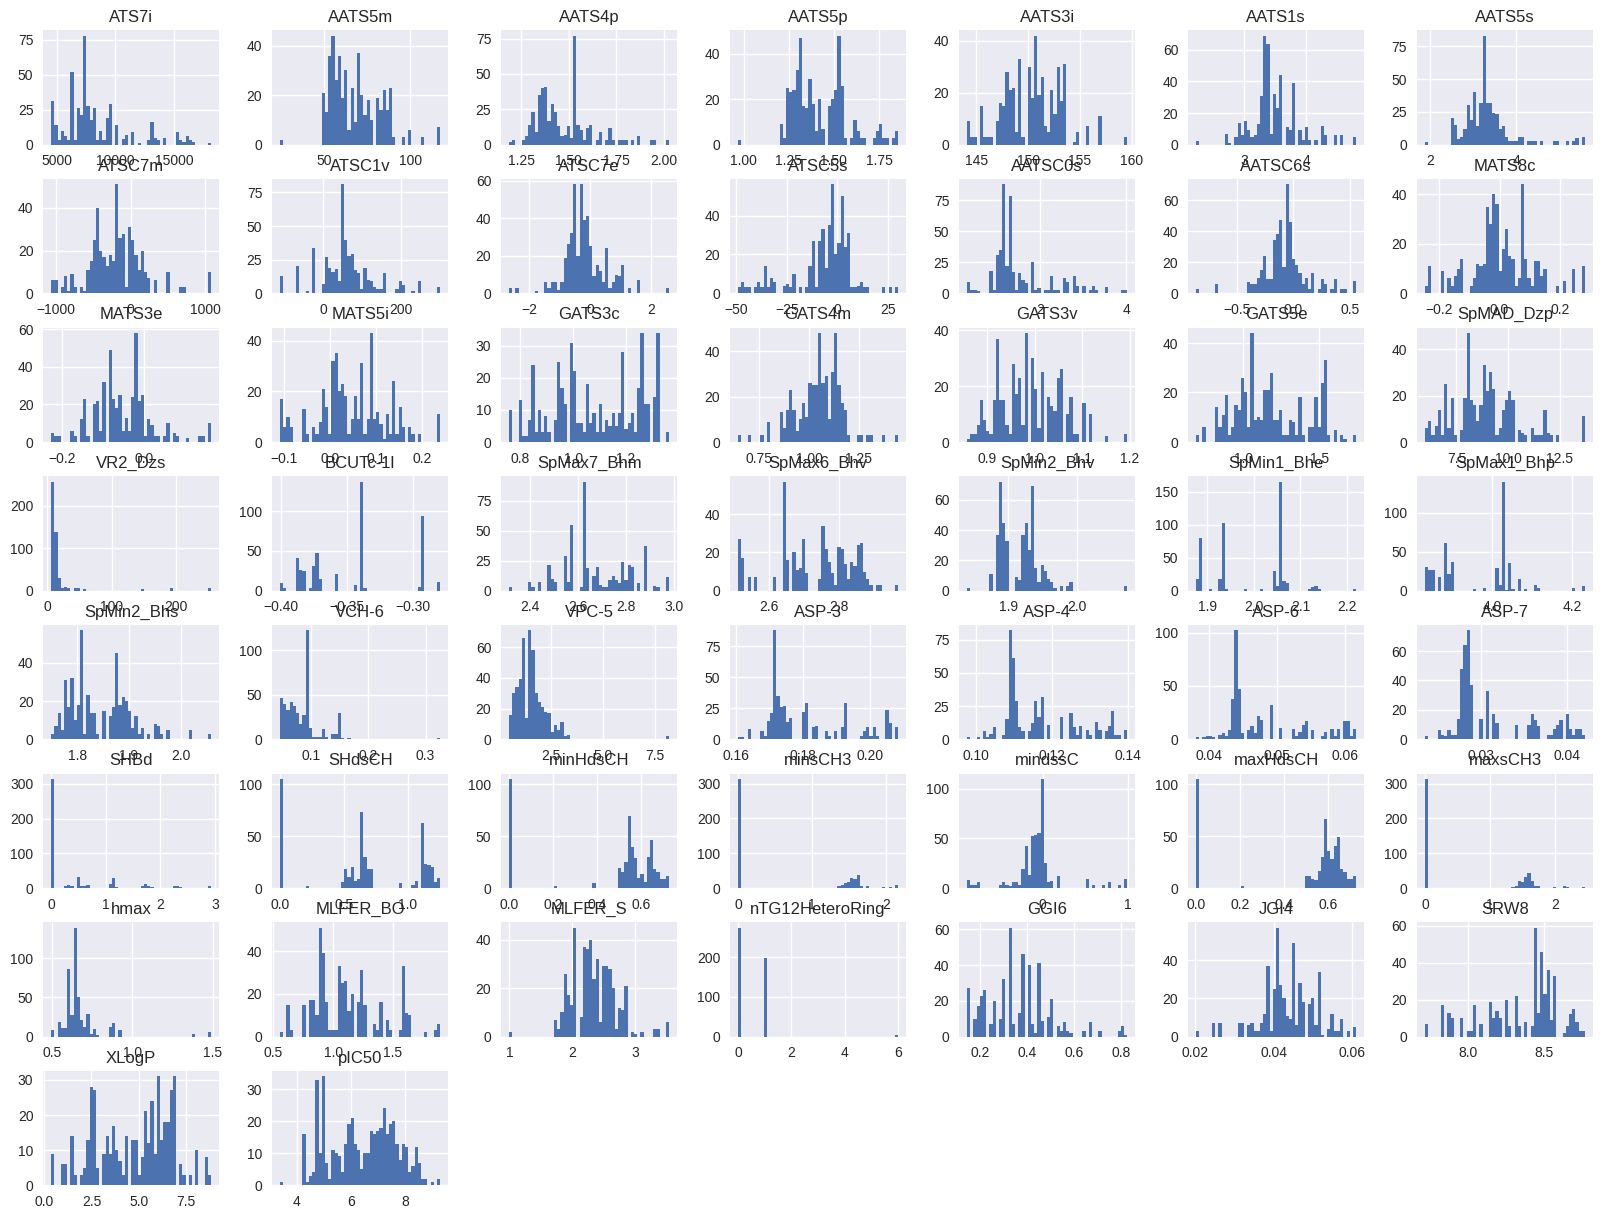

In [ ]:
df2.hist(bins = 50, figsize=(20,15))
plt.savefig('hist_gbr.png')
plt.show()

In [ ]:
model = GradientBoostingRegressor(random_state=seed)

In [ ]:
model.fit(X_train, Y_train)

GradientBoostingRegressor(random_state=44)

In [ ]:
Y_train_pred = model.predict(X_train)

In [ ]:
print(Y_train_pred)

[5.1412674  6.70103642 6.68105308 7.9909186  7.16712232 6.25630734
 5.80851958 5.01885733 5.70484484 5.4795955  5.76552609 7.24075129
 7.88230099 7.44724696 6.40432709 5.47145176 6.52558671 5.51022969
 5.79699243 5.47145176 5.76552609 6.890157   6.52558671 5.48511759
 7.53988548 5.76552609 7.15479676 6.51162905 6.27972119 6.52558671
 4.58106563 7.77623596 6.98356932 5.75602975 8.1855856  6.68105308
 5.74221984 6.03034727 5.46113924 8.02470535 5.37421846 6.67477184
 7.53988548 6.57719868 5.95954494 6.03034727 5.37421846 5.4795955
 7.33799175 6.27972119 6.89436101 7.1269085  5.4795955  5.63117942
 7.58539769 6.40432709 6.31044557 5.69188268 4.89886278 7.31681657
 6.70103642 6.52558671 5.69188268 7.77491439 6.52558671 5.79017091
 5.960835   8.18322404 7.13441884 6.52558671 5.65735235 6.51162905
 6.79674291 5.79699243 5.76552609 5.95954494 6.40432709 7.67580805
 7.16712232 7.31681657 6.52558671 5.76552609 6.82541371 6.52558671
 6.52558671 8.09398591 6.90962768 7.69788407 7.15479676 5.88466

In [ ]:
predictions1 = pd.DataFrame({'Y_train' : Y_train, 'Y_train_pred' : Y_train_pred})

In [ ]:
predictions1

Y_train  Y_train_pred
79   4.301030      5.141267
263  6.293282      6.701036
348  5.984640      6.681053
392  7.769551      7.990919
319  7.619789      7.167122
..        ...           ...
59   5.000000      6.525587
173  5.468521      5.510230
241  7.698970      6.825414
419  7.366532      7.722724
276  5.774949      5.598856

[380 rows x 2 columns]

In [ ]:
len(Y_train_pred)

380

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train))

The training r_sq is: 0.5105


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_pred))

The MAE is: 0.6847


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_pred)))

The RMSE is: 0.8611


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_pred))

The EVS is: 0.5105


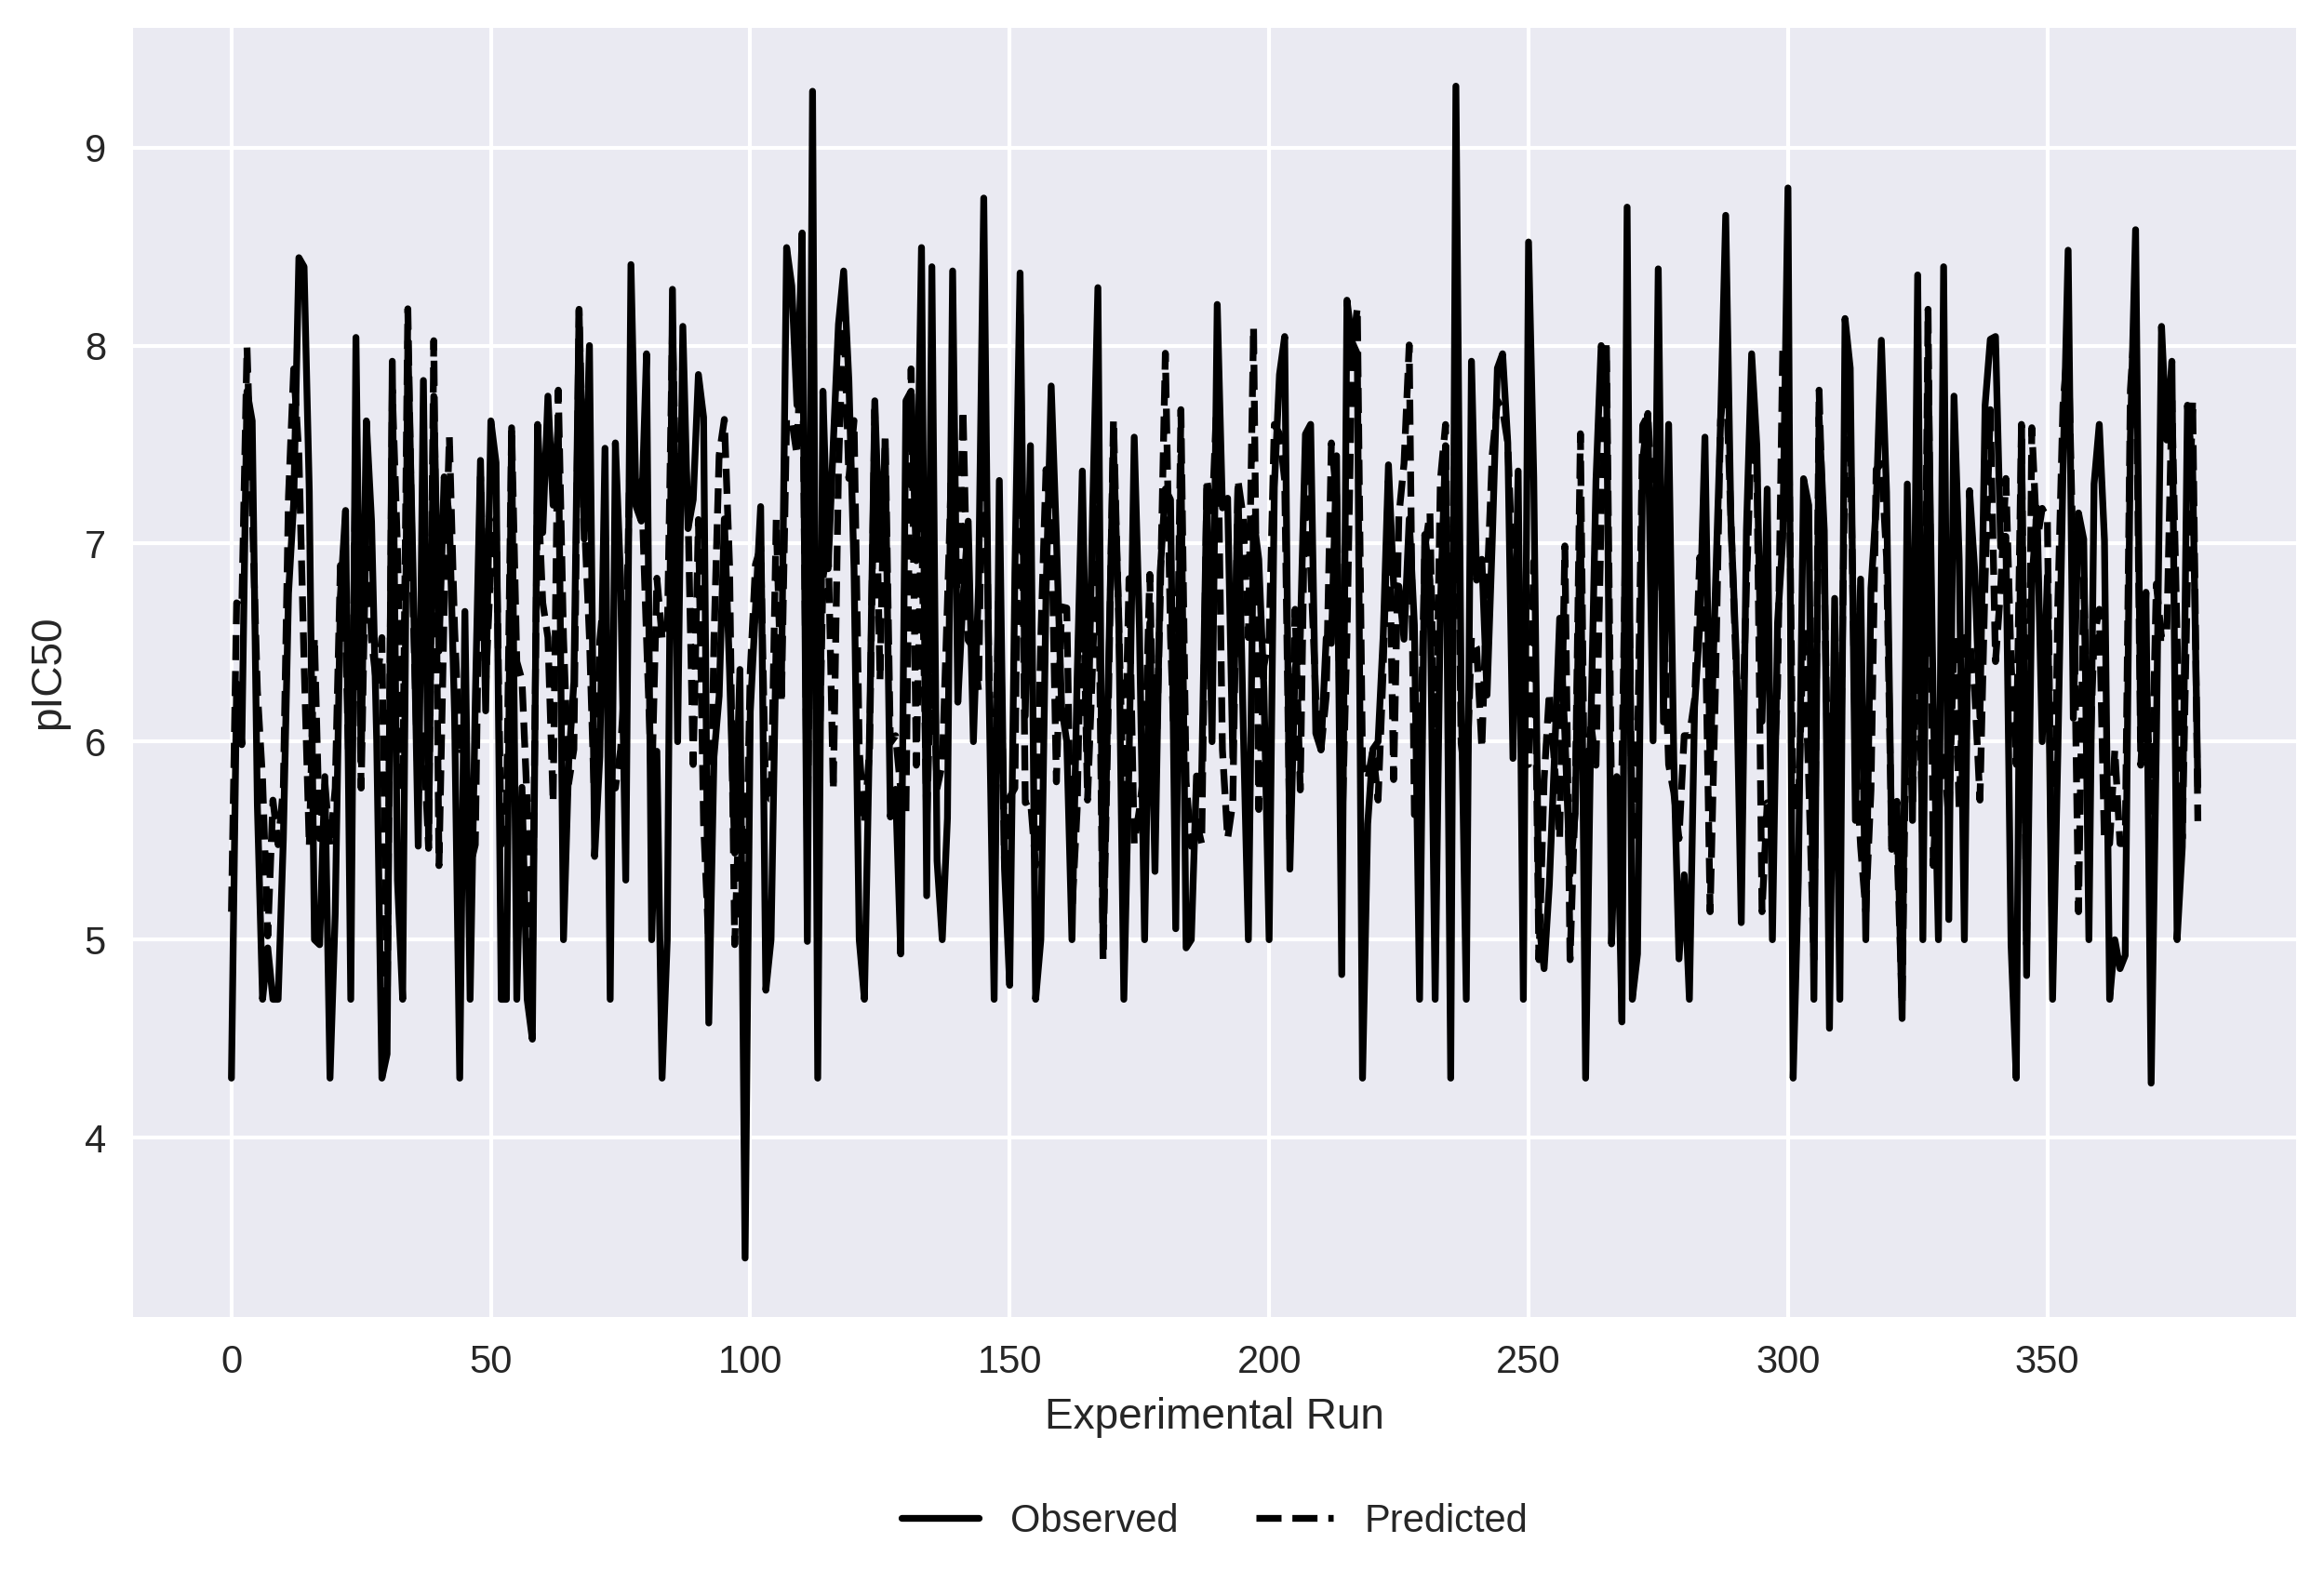

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
plt.figure(dpi=300)
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pIC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.savefig('OP_train_gbr.png', dpi=300, bbox_inches='tight')

In [ ]:
Y_test_pred = model.predict(X_test)

In [ ]:
Y_test_pred

array([6.40432709, 5.76552609, 7.33799175, 5.79699243, 7.55481834,
       5.79699243, 6.19371261, 7.17808308, 6.09638374, 6.52558671,
       6.15883111, 6.03034727, 5.01885733, 6.51162905, 6.40432709,
       6.21229157, 6.70103642, 5.69188268, 5.58522056, 7.53988548,
       5.1412674 , 6.52558671, 6.35668036, 6.68105308, 6.82445469,
       6.8235734 , 5.76552609, 7.16712232, 5.95954494, 5.65735235,
       6.890157  , 6.8783625 , 5.63117942, 6.40432709, 5.99389719,
       6.03034727, 7.64786442, 7.59797418, 7.45104866, 5.74221984,
       6.09638374, 5.66727555, 5.95954494, 5.47145176, 7.1269085 ,
       5.76552609, 5.79017091, 6.79674291, 6.6230024 , 5.88466002,
       6.67477184, 7.69788407, 5.37421846, 6.40432709, 5.79017091,
       5.80851958, 7.33799175, 5.58522056, 6.25630734, 6.22916236,
       7.77623596, 7.1269085 , 5.47145176, 7.43800544, 7.44715929,
       5.88084737, 5.1412674 , 5.46113924, 7.24075129, 6.890157  ,
       4.67159217, 6.52558671, 6.15883111, 6.19371261, 8.00306

In [ ]:
len(Y_test_pred)

96

In [ ]:
predictions2 = pd.DataFrame({'Y_test' : Y_test, 'Y_test_pred' : Y_test_pred})

In [ ]:
predictions2

Y_test  Y_test_pred
85   8.096910     6.404327
78   4.301030     5.765526
472  6.000000     7.337992
182  5.113509     5.796992
323  7.443697     7.554818
..        ...          ...
446  6.889410     6.623002
169  5.585027     6.310446
288  4.718762     4.581066
107  7.113509     4.898863
115  6.876148     6.212292

[96 rows x 2 columns]

In [ ]:
print('The testing r_sq is: %.4f'% r2_score(Y_test, Y_test_pred))

The testing r_sq is: 0.2684


In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test))

The testing r_sq is: 0.2684


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_pred))

The MAE is: 0.8618


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_pred)))

The RMSE is: 1.0287


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_pred))

The EVS is: 0.2731


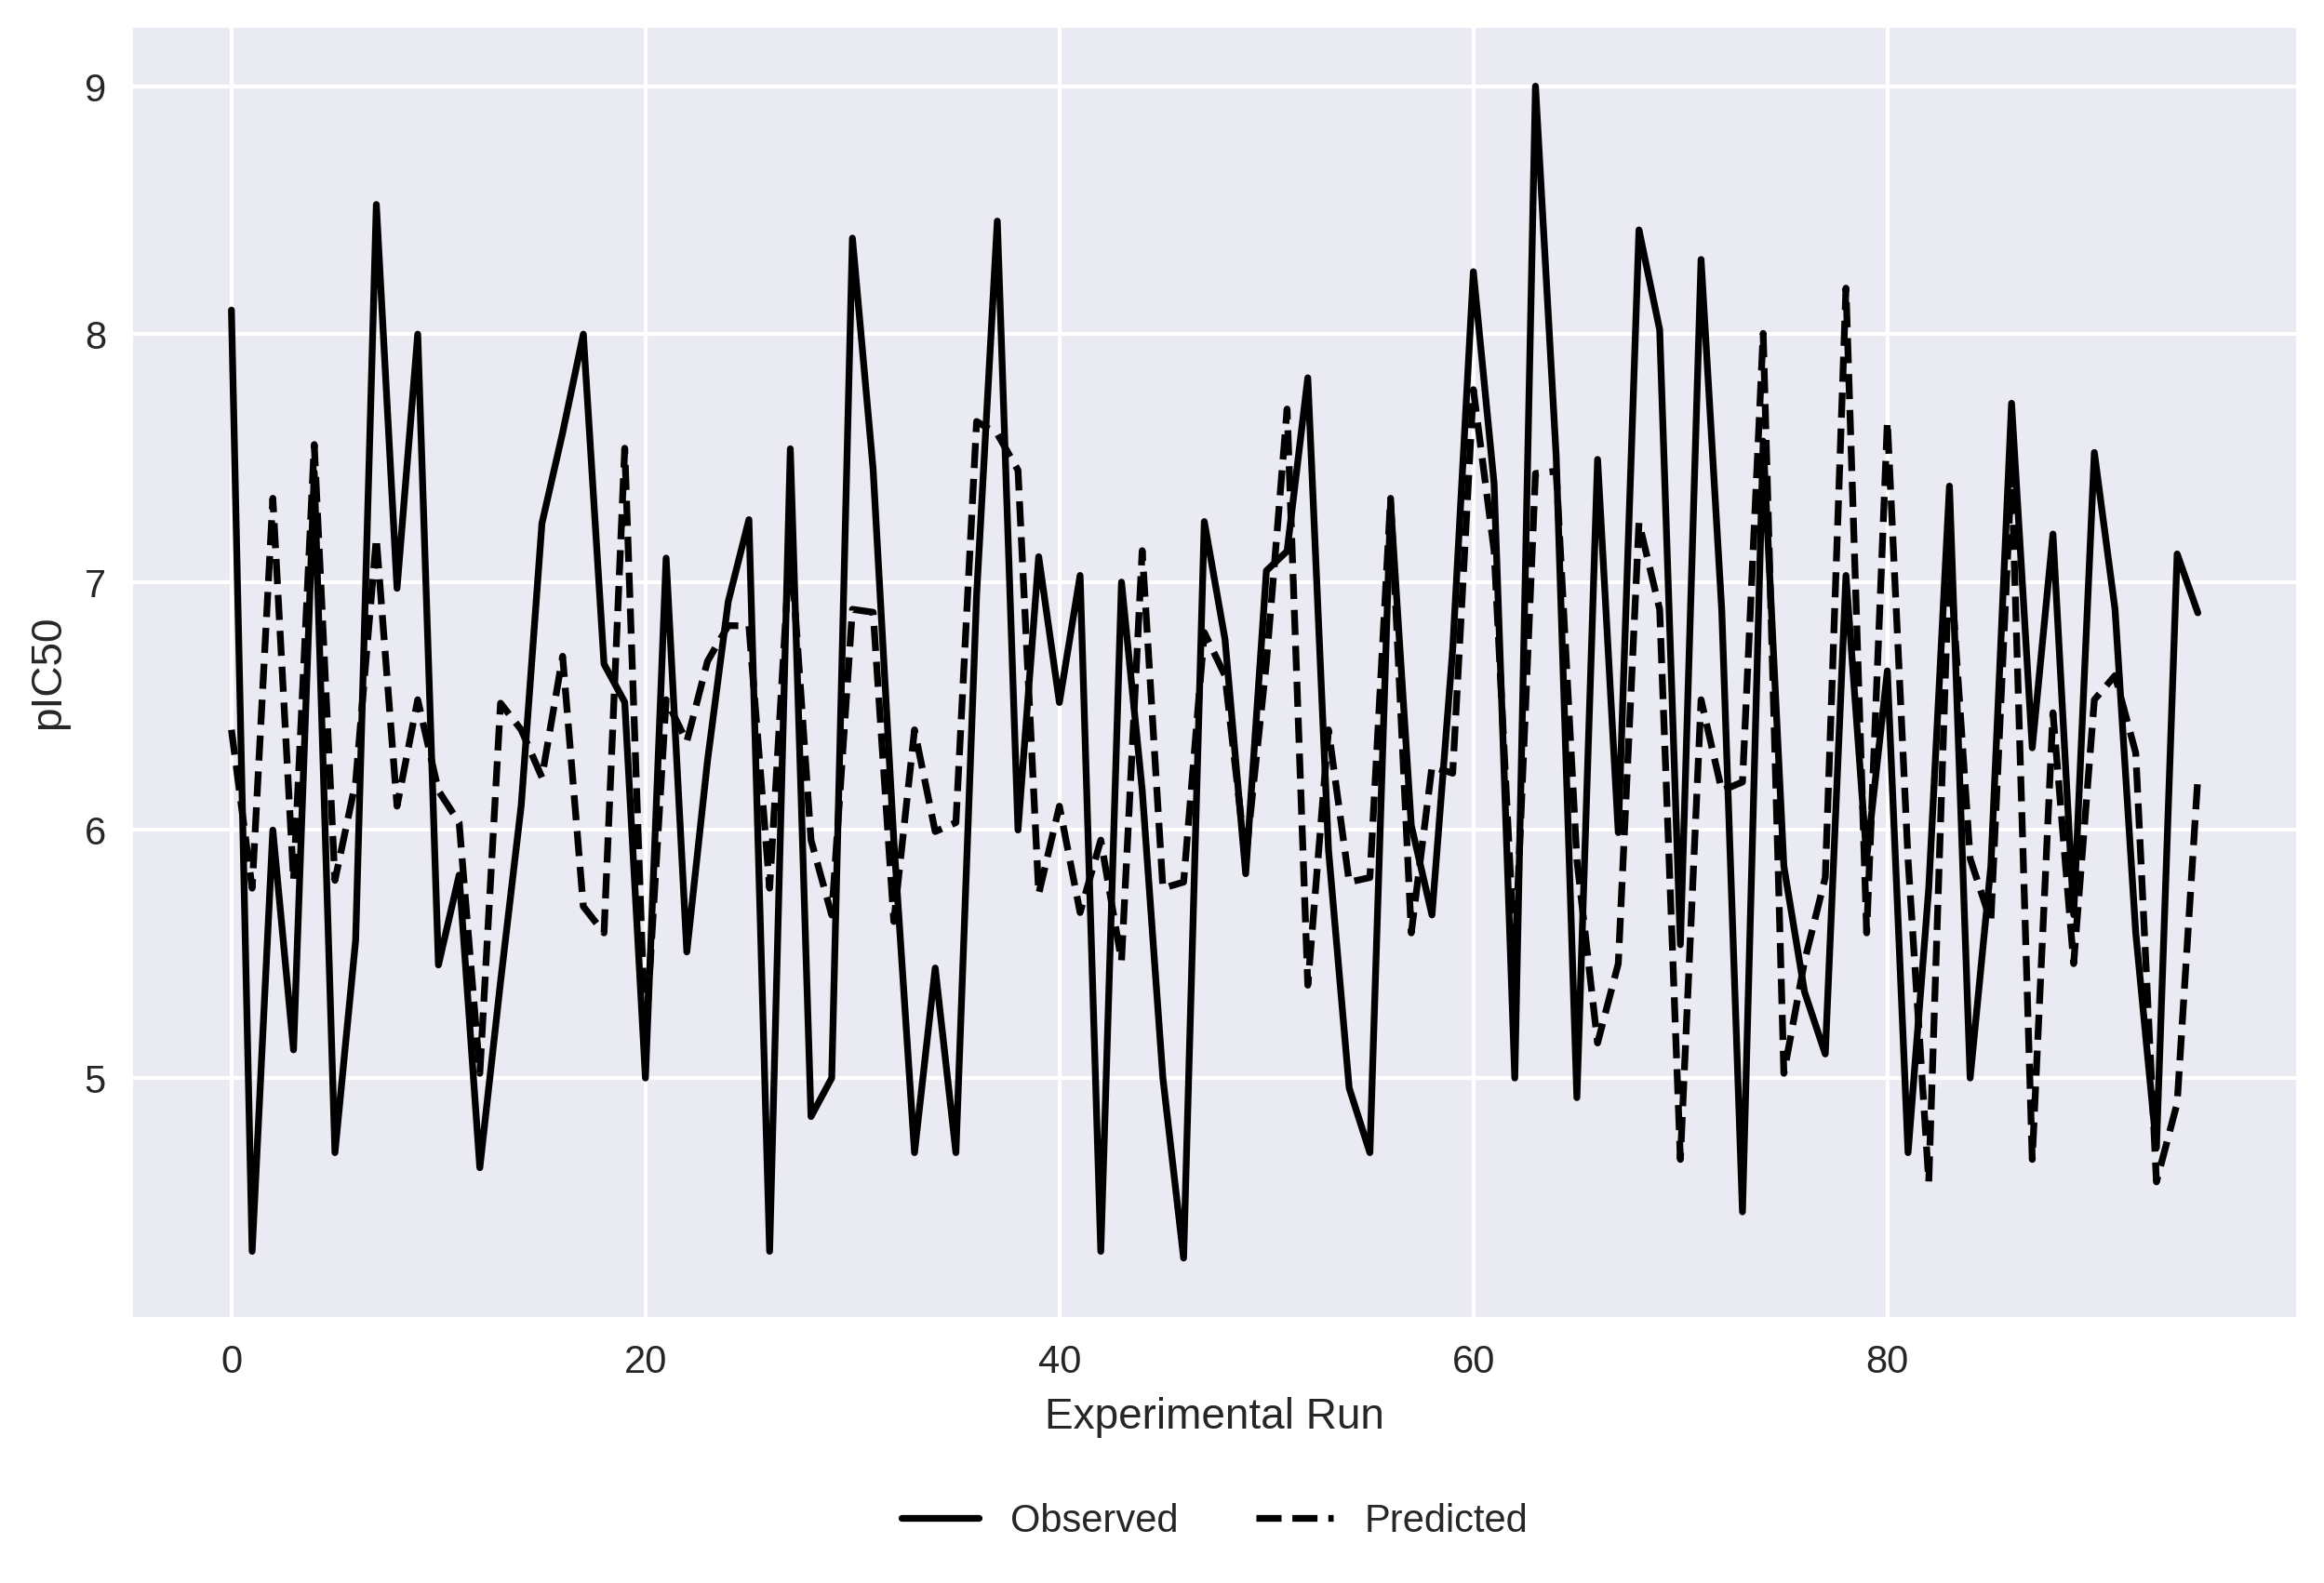

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
plt.figure(dpi=300)
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_pred, label = 'Predicted', color = 'k', linestyle = '--')
plt.ylabel('pIC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.savefig('OP_test_gbr.png', dpi=300, bbox_inches='tight')

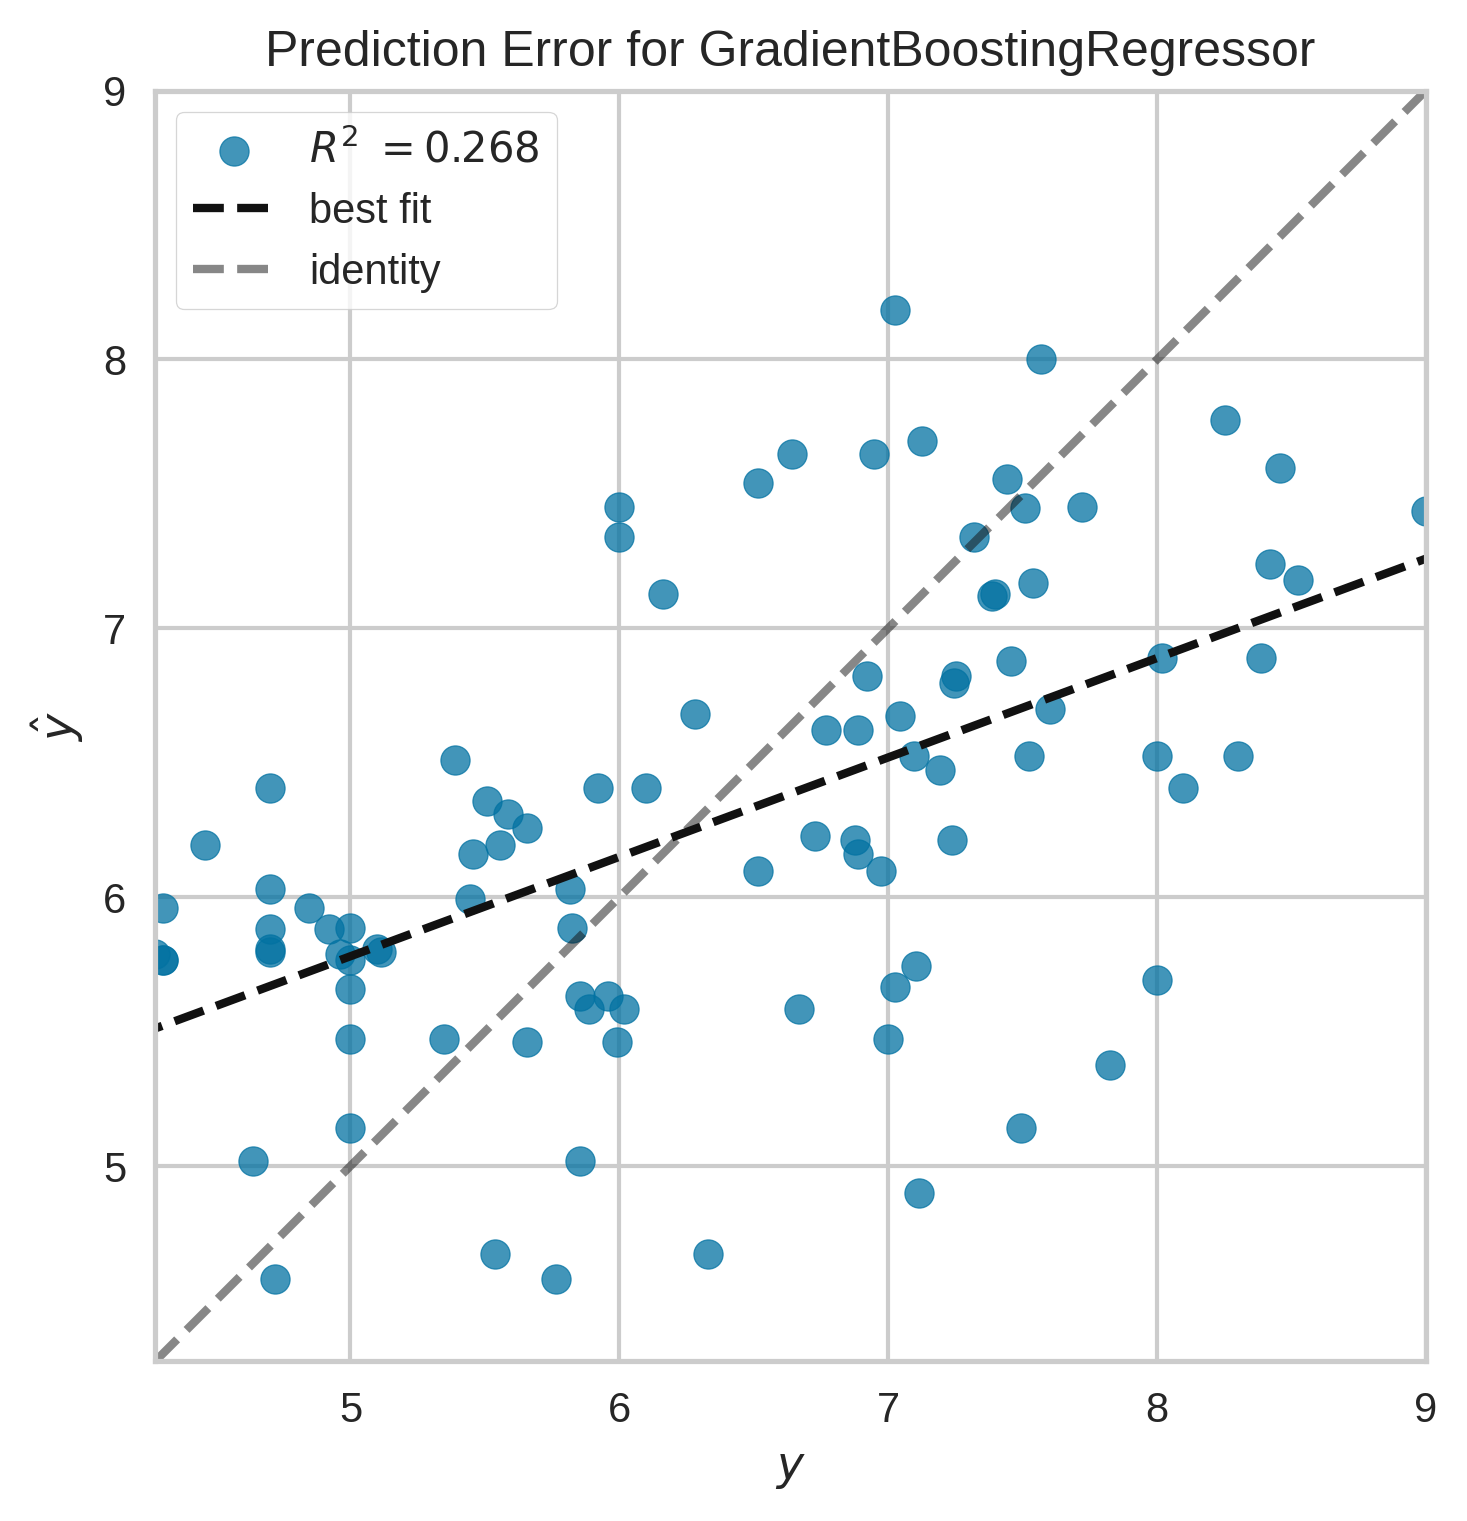

<Axes: title={'center': 'Prediction Error for GradientBoostingRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [ ]:
from yellowbrick.regressor import PredictionError
plt.figure(dpi=300)
visualizer = PredictionError(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
plt.savefig('prediction_error_gbr.png', dpi=300, bbox_inches='tight')
visualizer.poof()

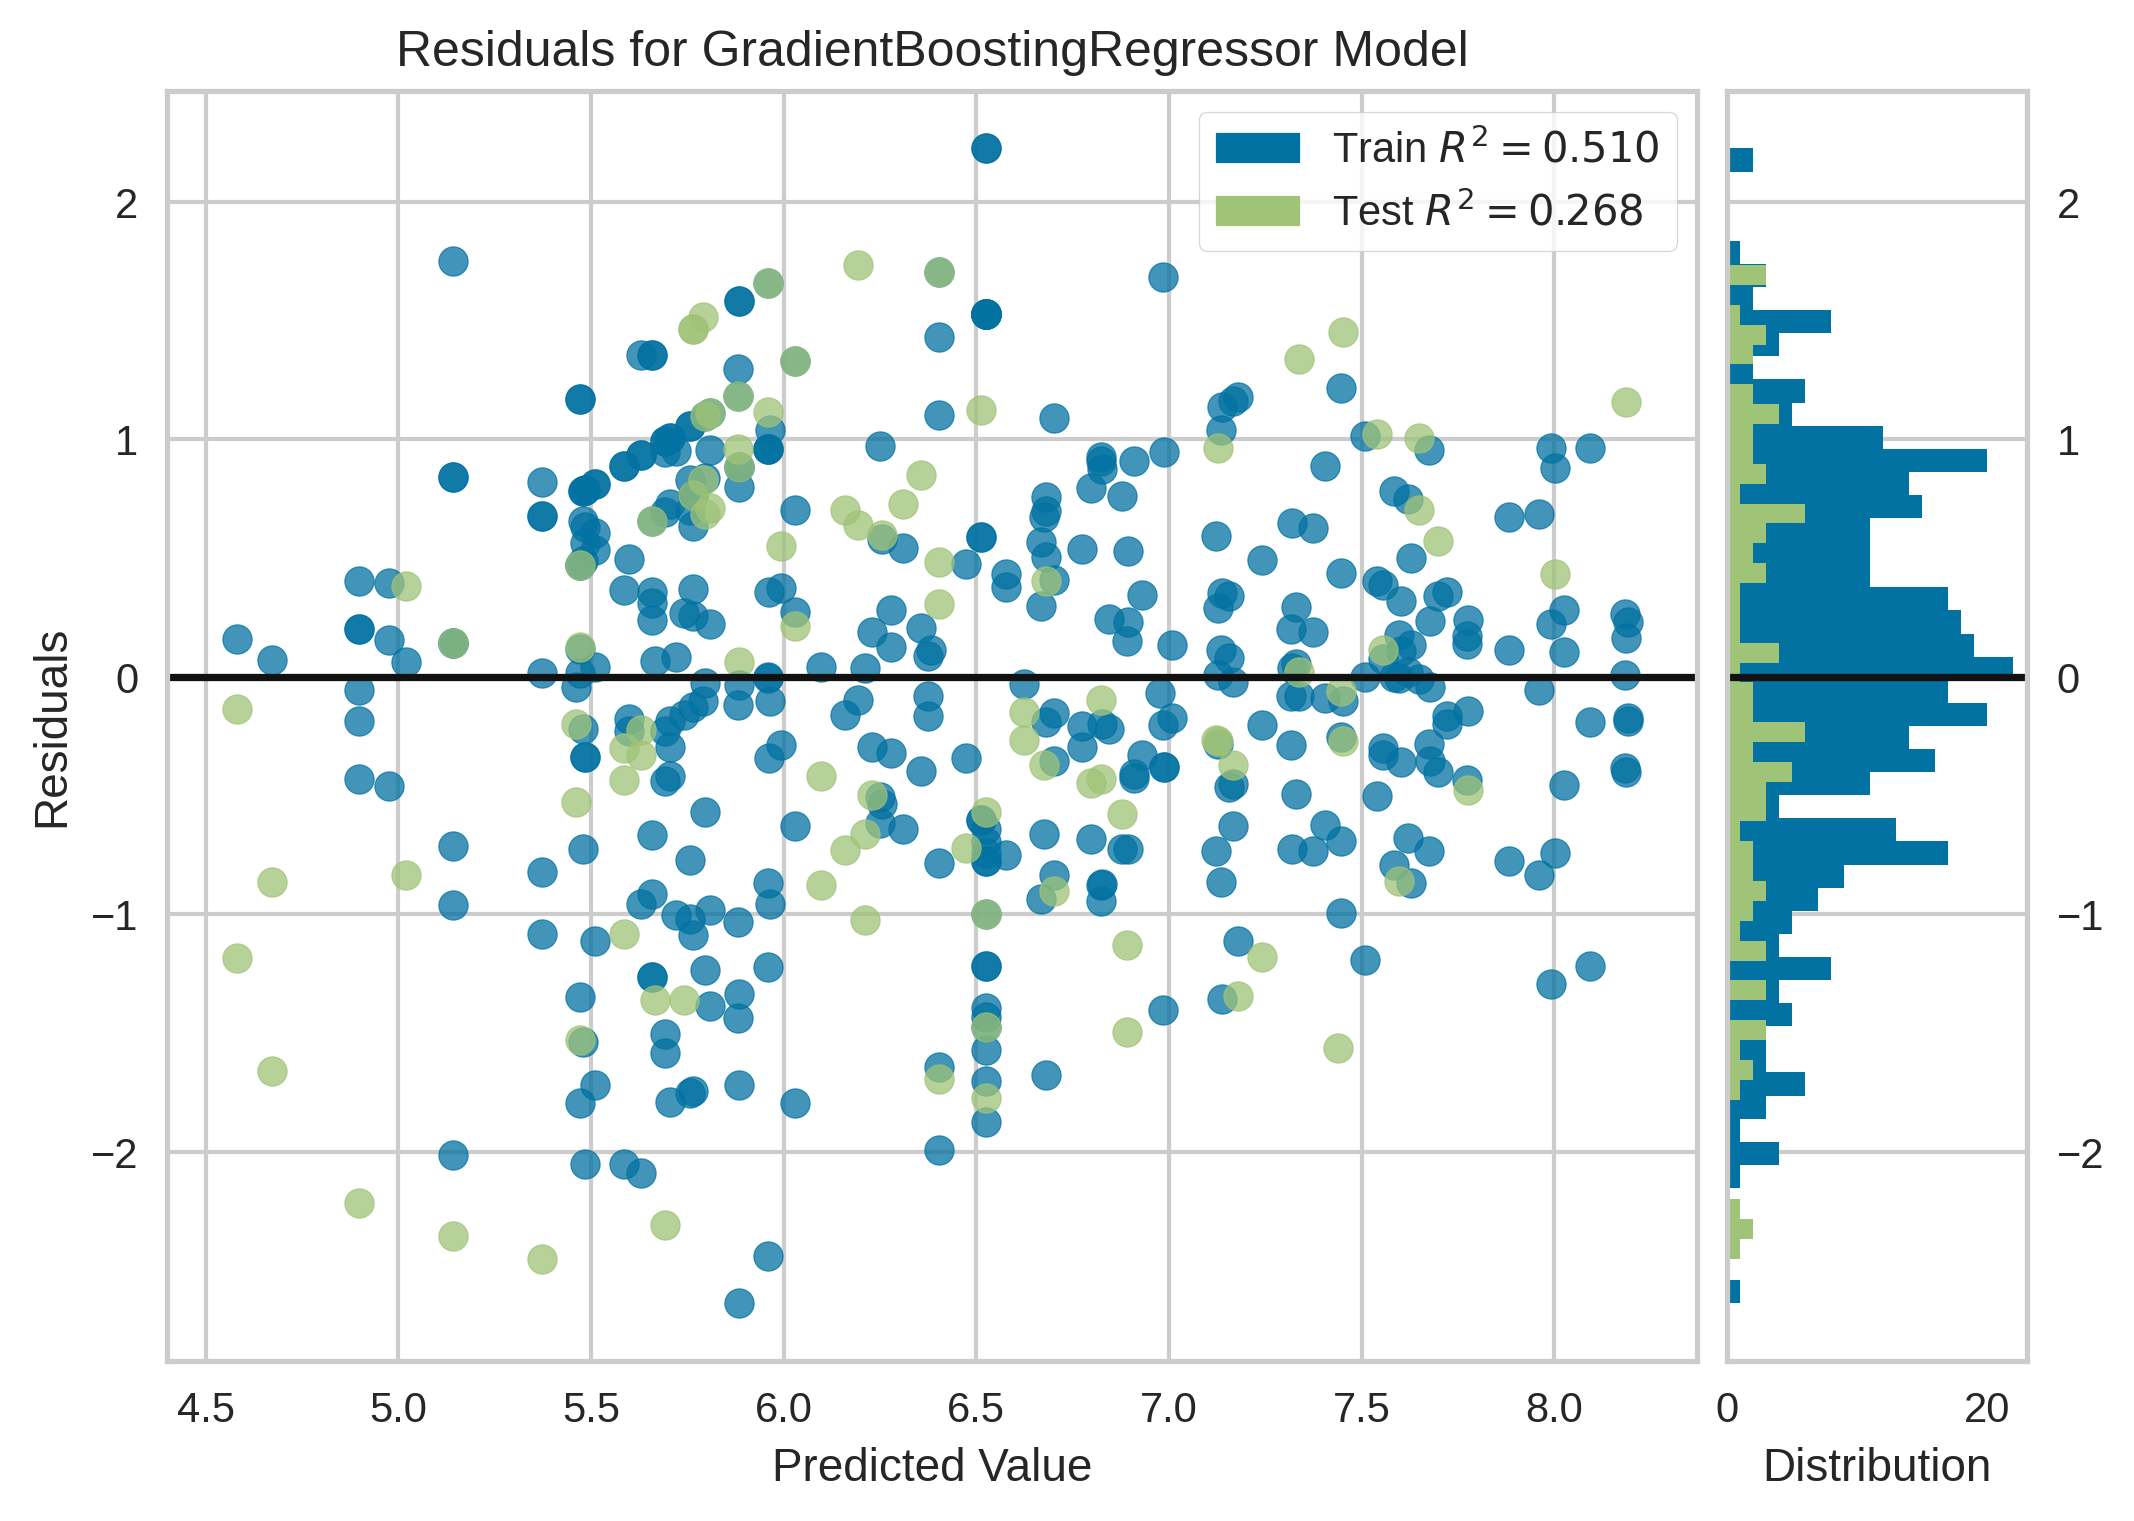

<Axes: title={'center': 'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
plt.figure(dpi=300)
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train)
visualizer.score(X_test, Y_test)
visualizer.ax.legend(loc='best')
plt.savefig('Residualsplot_gbr.png', dpi=300, bbox_inches='tight')
visualizer.poof()

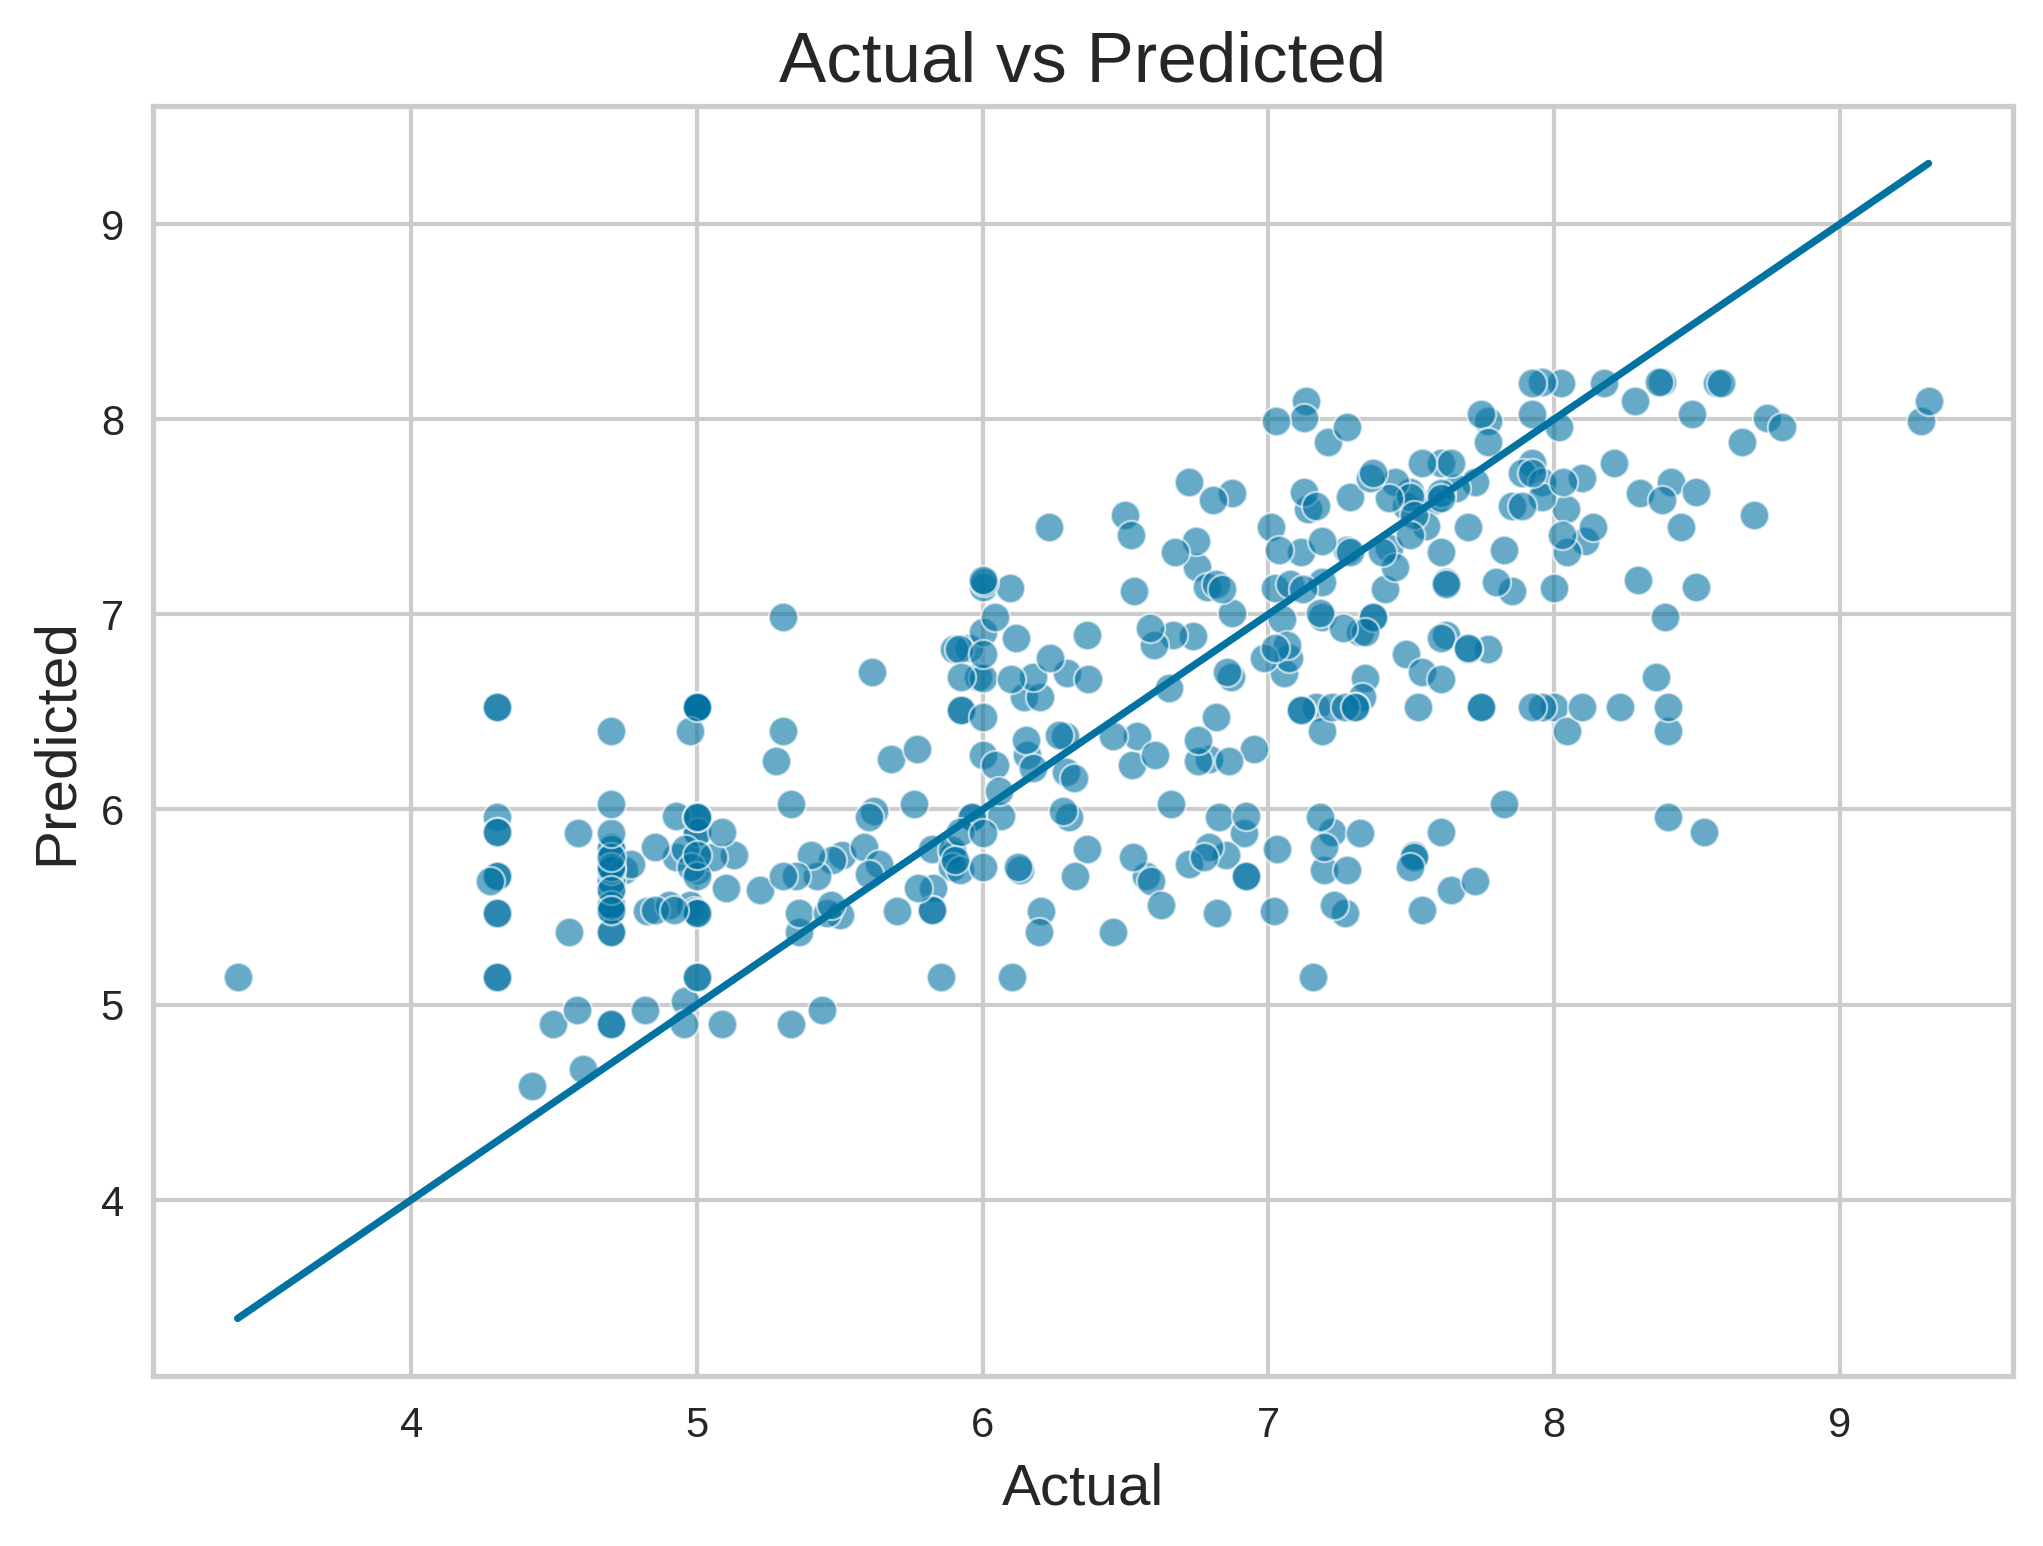

In [ ]:
plt.figure(dpi=300)
sns.scatterplot(x=Y_train, y=Y_train_pred, alpha=0.6)
sns.lineplot(x=Y_train, y=Y_train)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Actual vs Predicted', fontsize = 17)
plt.savefig('scatter_train_gbr.png', dpi=300, bbox_inches='tight')
plt.show()

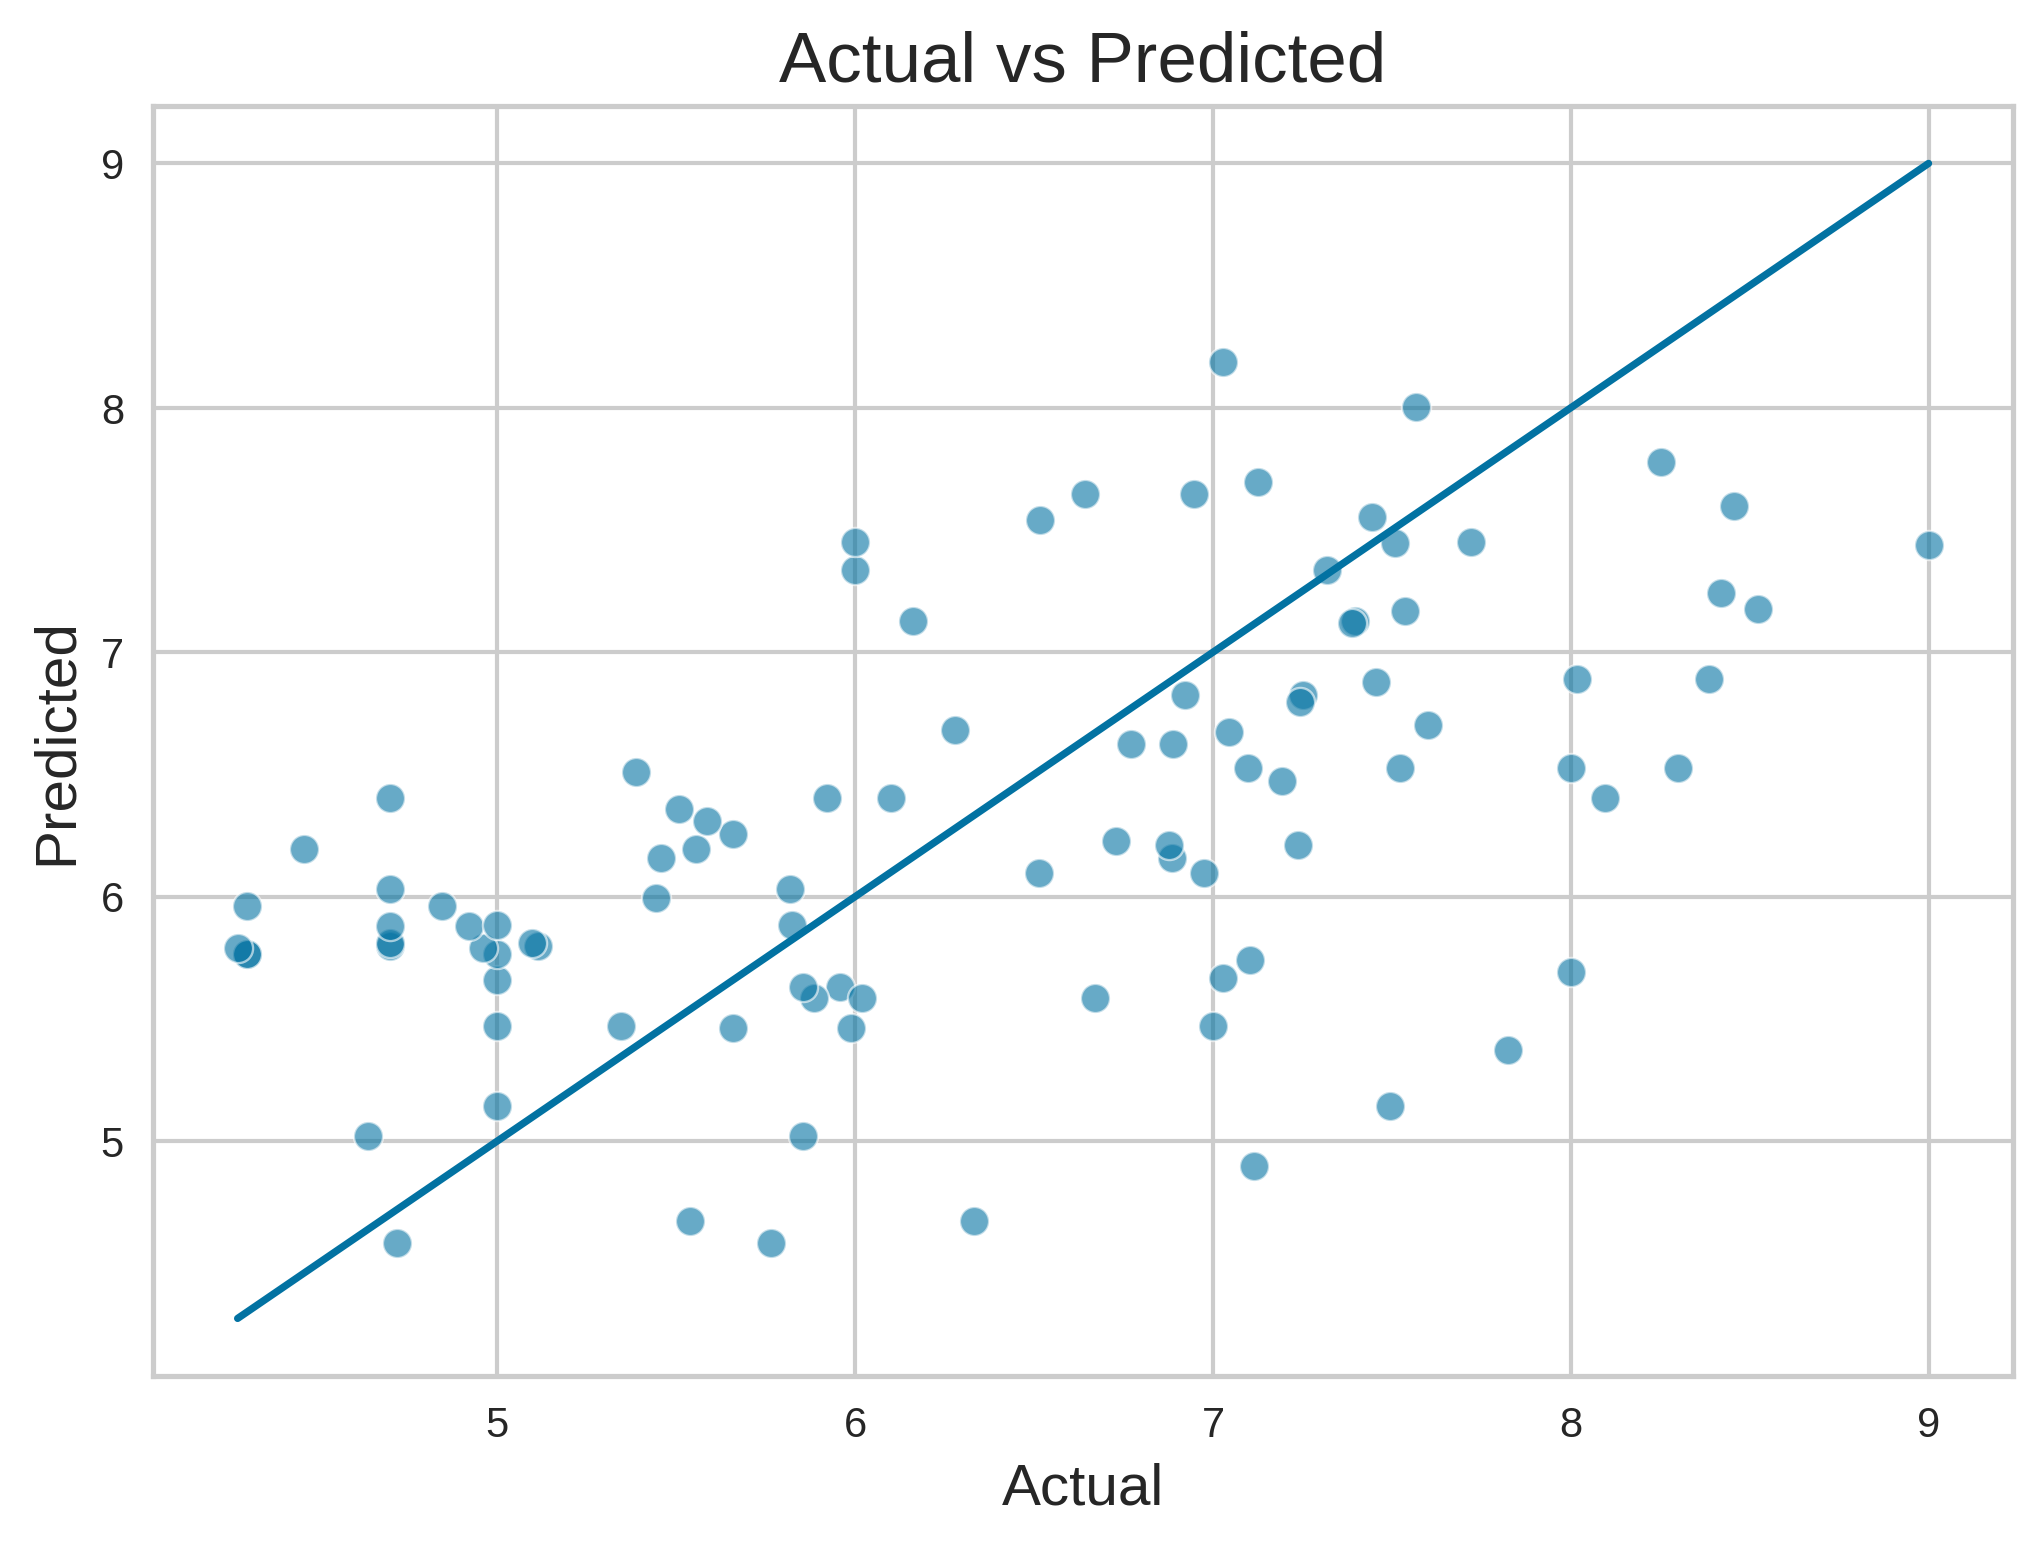

In [ ]:
plt.figure(dpi=300)
sns.scatterplot(x=Y_test, y=Y_test_pred, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Actual vs Predicted', fontsize = 17)
plt.savefig('scatter_test_gbr.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
model.score(X_test, Y_test)

0.268407323468528

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_pred)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

1.03

From here we have to present in poster

In [ ]:
my_param_grid = {'n_estimators':[10, 100, 500], 'max_features':['sqrt', 'log2'], 'max_depth': [5,10,20]}

In [ ]:
#my_param_grid = {'max_leaf_nodes':[7, 8, 9], 'max_depth':[6, 7, 8], 'min_samples_leaf': [3, 4, 5]}

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
GridSearchCV(estimator=GradientBoostingRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=44),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=3)

In [ ]:
grid = GridSearchCV(estimator=GradientBoostingRegressor(random_state=seed), param_grid = my_param_grid, refit = True, verbose = 3, cv=5)

In [ ]:
grid.fit(X_train, Y_train)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
[CV 1/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.288 total time=   0.0s
[CV 2/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.329 total time=   0.0s
[CV 3/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.205 total time=   0.0s
[CV 4/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.286 total time=   0.0s
[CV 5/5] END max_depth=5, max_features=sqrt, n_estimators=10;, score=0.280 total time=   0.0s
[CV 1/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.276 total time=   0.1s
[CV 2/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.269 total time=   0.1s
[CV 3/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=-0.217 total time=   0.1s
[CV 4/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.153 total time=   0.1s
[CV 5/5] END max_depth=5, max_features=sqrt, n_estimators=100;, score=0.175 total time= 

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(random_state=44),
             param_grid={'max_depth': [5, 10, 20],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [10, 100, 500]},
             verbose=3)

In [ ]:
grid.best_params_

{'max_depth': 5, 'max_features': 'sqrt', 'n_estimators': 10}

In [ ]:
Y_test_optimised = grid.predict(X_test)

In [ ]:
Y_test_optimised

array([6.40104111, 5.9598907 , 7.0546173 , 6.0366371 , 7.03427909,
       6.0366371 , 6.33464944, 6.93201748, 6.22552138, 6.51747095,
       6.20565224, 6.08095514, 5.55857386, 6.53905876, 6.40104111,
       6.27848163, 6.62261248, 5.9693479 , 5.9062523 , 7.19259531,
       5.65062965, 6.51747095, 6.17774924, 6.62494047, 6.64216626,
       6.67417064, 5.9598907 , 6.87751408, 6.07355245, 5.95004653,
       6.88208579, 6.72060998, 6.05154903, 6.40104111, 6.10148685,
       6.08095514, 7.29933178, 7.18050147, 7.08441436, 5.99237443,
       6.22552138, 6.15052555, 6.07355245, 5.8582481 , 6.86031415,
       5.9598907 , 5.98538104, 6.65207013, 6.51927017, 6.00690138,
       6.63868383, 7.18985142, 5.90563553, 6.40104111, 5.98538104,
       5.9816329 , 7.0546173 , 5.9062523 , 6.30928516, 6.11833435,
       7.3278719 , 6.86031415, 5.8582481 , 7.08155654, 7.13389022,
       6.08069591, 5.65062965, 5.88430583, 7.00101855, 6.88208579,
       5.38630313, 6.51747095, 6.20565224, 6.33464944, 7.43312

In [ ]:
predictions2['Y_test_optimised'] = Y_test_optimised
predictions2.head()

Y_test  Y_test_pred  Y_test_optimised
85   8.096910     6.404327          6.401041
78   4.301030     5.765526          5.959891
472  6.000000     7.337992          7.054617
182  5.113509     5.796992          6.036637
323  7.443697     7.554818          7.034279

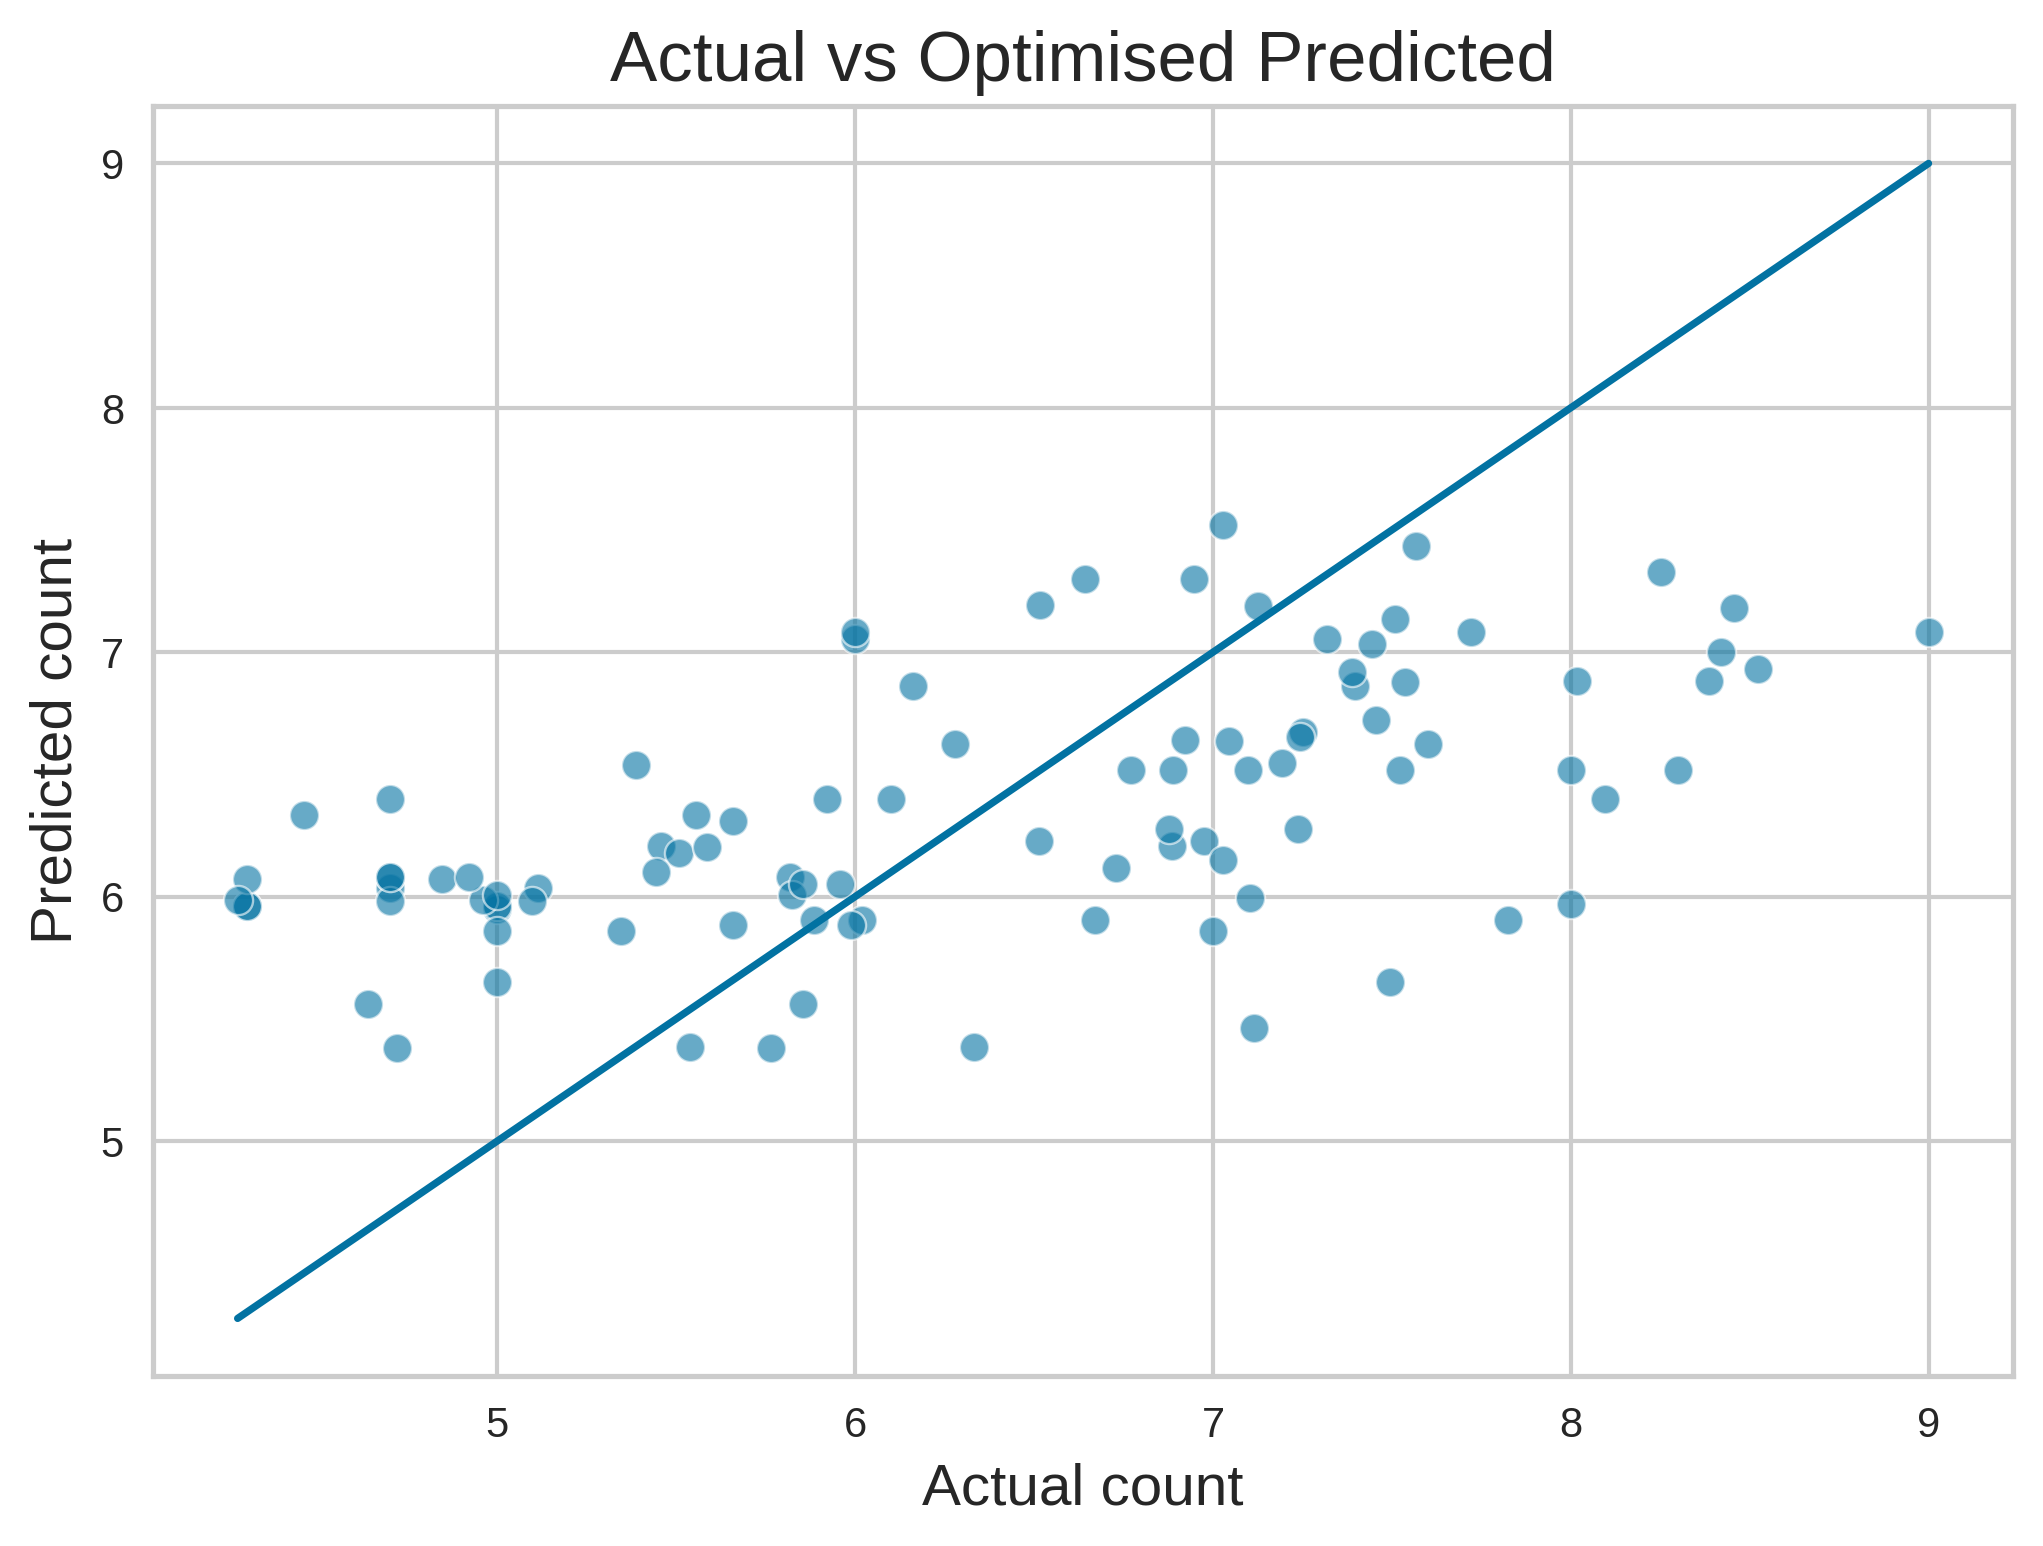

In [ ]:
plt.figure(dpi=300)
sns.scatterplot(x=Y_test, y=Y_test_optimised, alpha=0.6)
sns.lineplot(x=Y_test, y=Y_test)
plt.xlabel('Actual count', fontsize = 14)
plt.ylabel('Predicted count', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.savefig('scatterh_test_gbr.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
grid.score(X_test, Y_test)

0.31157892058621994

In [ ]:
MSE_test = round(np.mean(np.square(Y_test - Y_test_optimised)),2)
RMSE_test = round(np.sqrt(MSE_test),2)
RMSE_test

1.0

In [ ]:
print('The testing r_sq is: %.4f'% model.score(X_test, Y_test_optimised))

The testing r_sq is: 0.6223


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_test, Y_test_optimised))

The MAE is: 0.8524


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_test, Y_test_optimised)))

The RMSE is: 0.9979


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_test, Y_test_optimised))

The EVS is: 0.3118


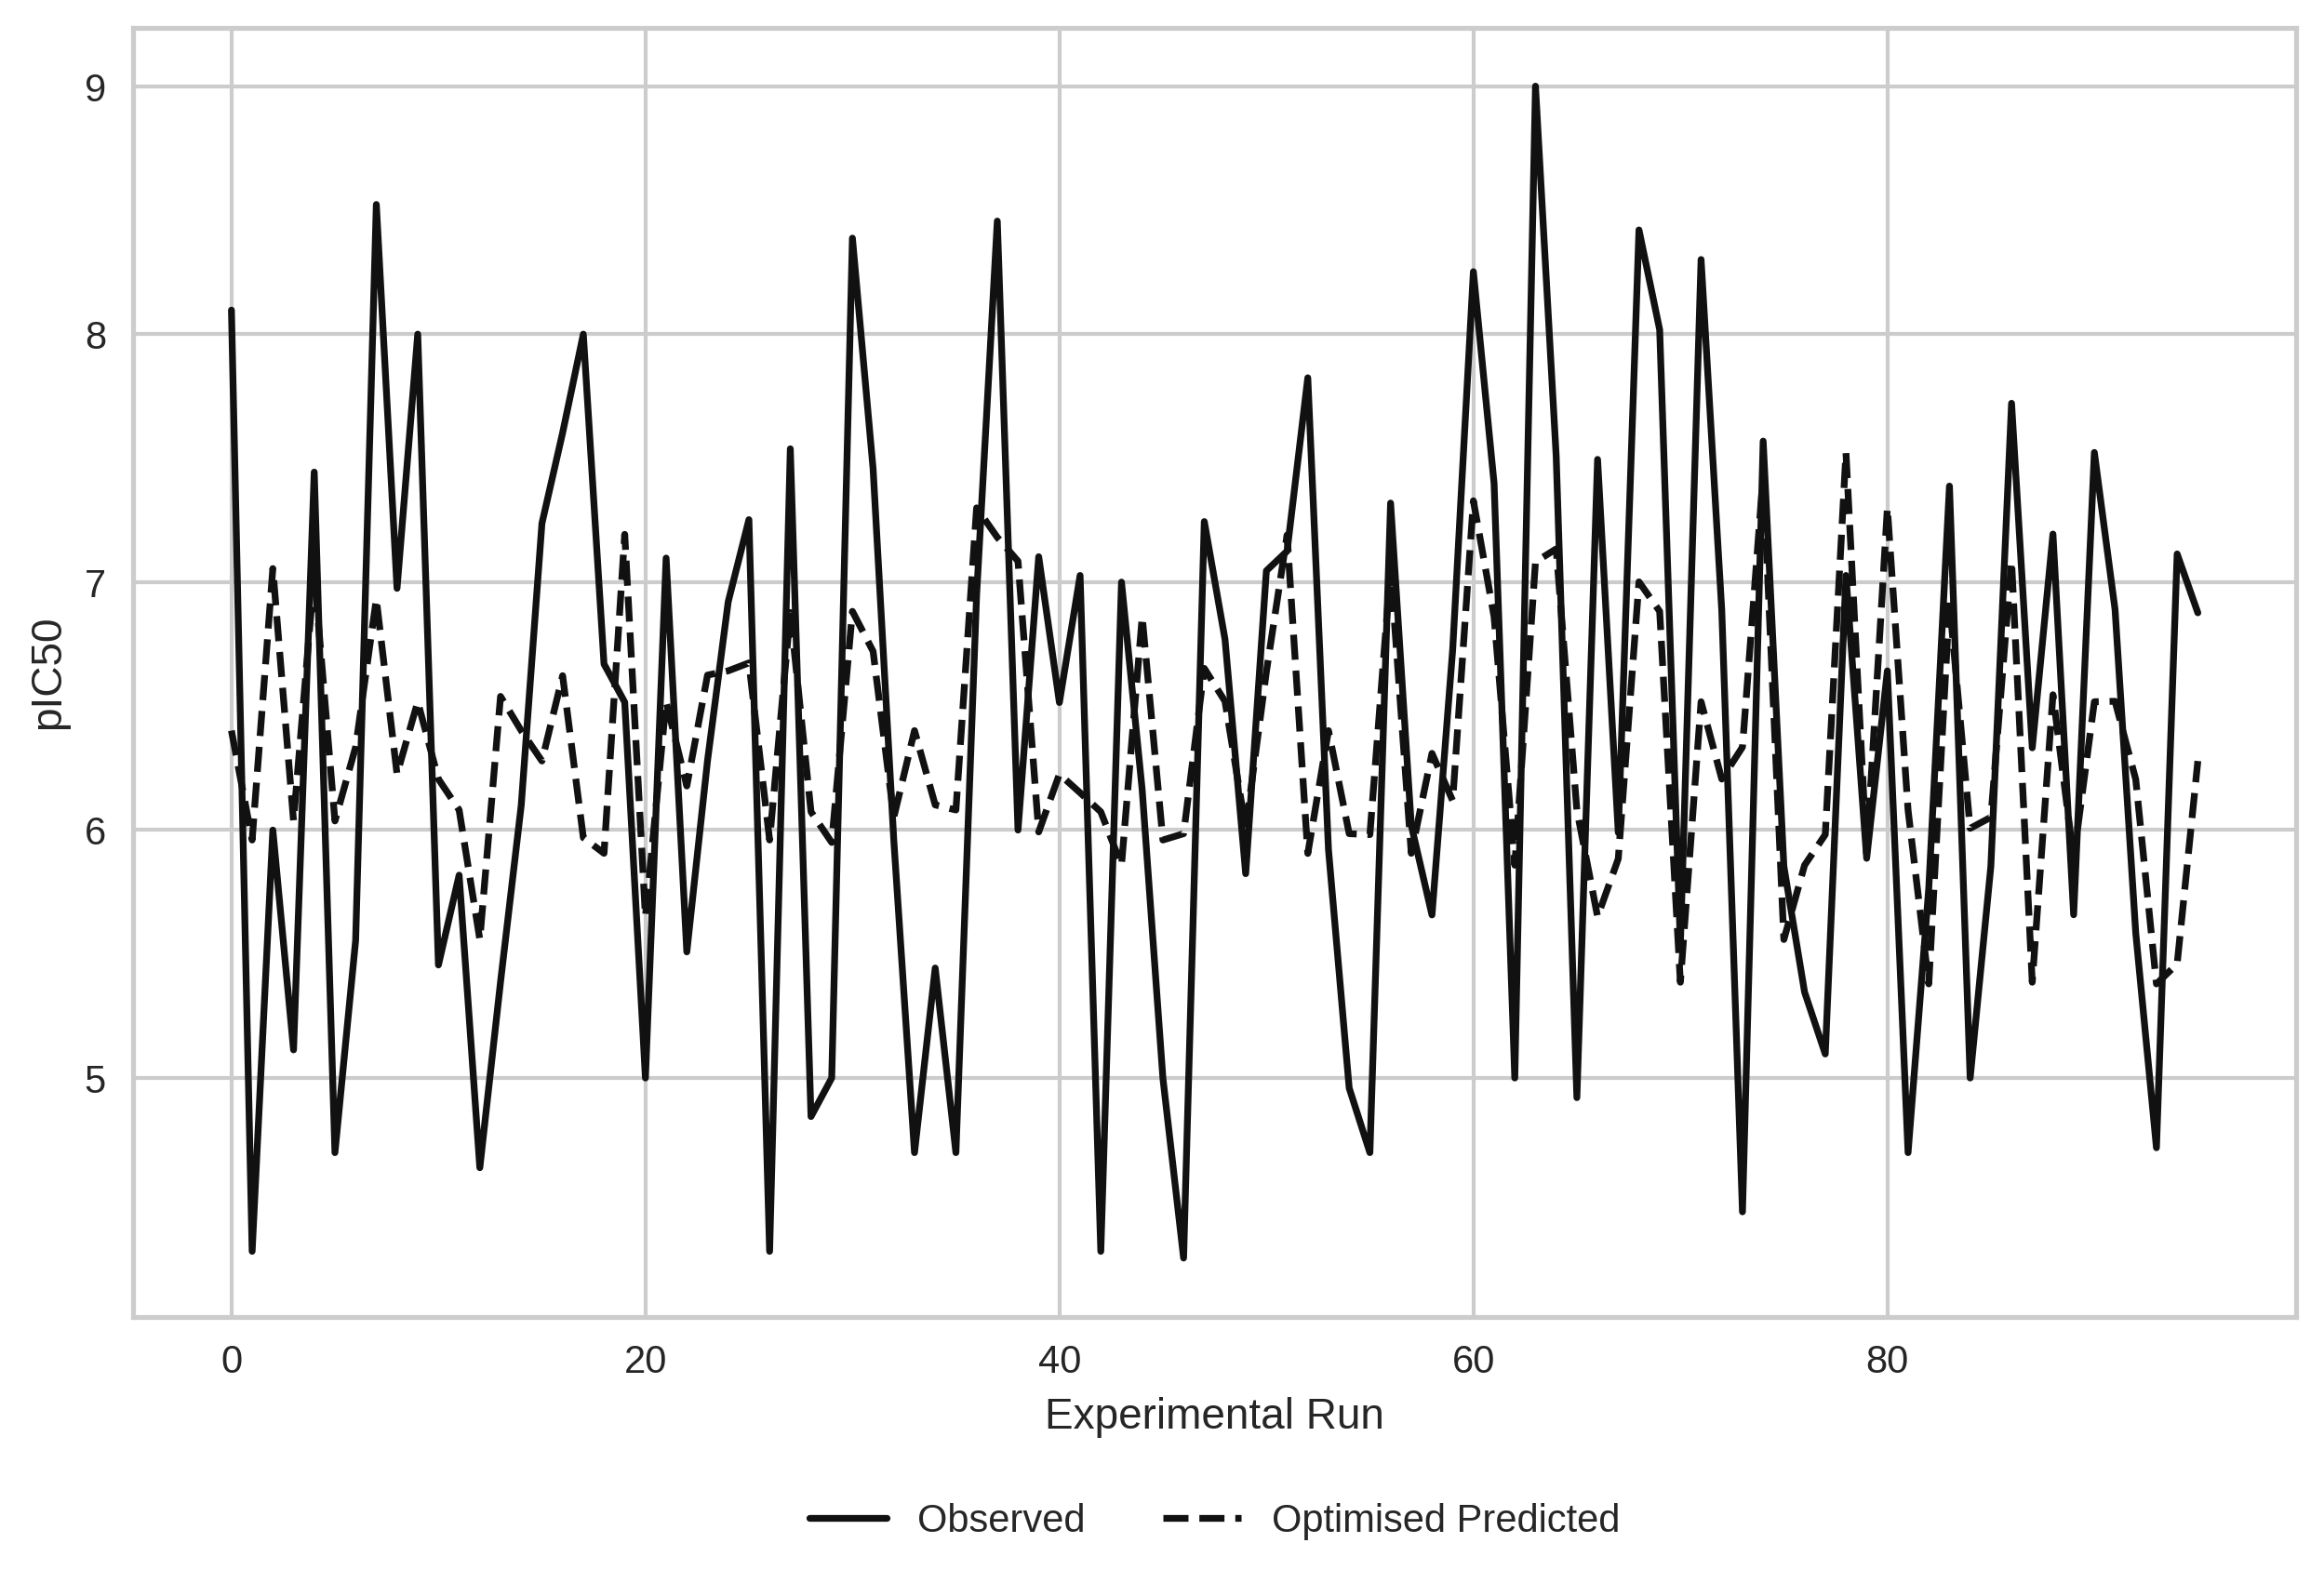

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
plt.figure(dpi=300)
x_ax = range(len(X_test))
plt.plot(x_ax, Y_test, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_test_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('pIC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.savefig('OPH_test_gbr.png', dpi=300, bbox_inches='tight')

In [ ]:
Y_train_optimised = grid.predict(X_train)

In [ ]:
Y_train_optimised

array([5.65062965, 6.62261248, 6.62494047, 7.43168005, 6.87751408,
       6.30928516, 5.9816329 , 5.55857386, 6.02086712, 5.86273759,
       5.9598907 , 7.00101855, 7.37224938, 7.06929954, 6.40104111,
       5.8582481 , 6.51747095, 5.8638039 , 6.0366371 , 5.8582481 ,
       5.9598907 , 6.88208579, 6.51747095, 5.89441362, 7.19259531,
       5.9598907 , 6.92101898, 6.53905876, 6.41088847, 6.51747095,
       5.37954993, 7.3278719 , 6.92631373, 6.05093226, 7.52225416,
       6.62494047, 5.99237443, 6.08095514, 5.88430583, 7.46275716,
       5.90563553, 6.63868383, 7.19259531, 6.58617993, 6.07355245,
       6.08095514, 5.90563553, 5.86273759, 7.0546173 , 6.41088847,
       6.72294729, 6.86031415, 5.86273759, 6.05154903, 7.16943304,
       6.40104111, 6.20397678, 5.9693479 , 5.46028602, 7.02311294,
       6.62261248, 6.51747095, 5.9693479 , 7.30307164, 6.51747095,
       5.98538104, 6.13563206, 7.49932246, 7.05216703, 6.51747095,
       5.95004653, 6.53905876, 6.65207013, 6.0366371 , 5.95989

In [ ]:
predictions1['Y_train_optimised'] = Y_train_optimised
predictions1.head()

Y_train  Y_train_pred  Y_train_optimised
79   4.301030      5.141267           5.650630
263  6.293282      6.701036           6.622612
348  5.984640      6.681053           6.624940
392  7.769551      7.990919           7.431680
319  7.619789      7.167122           6.877514

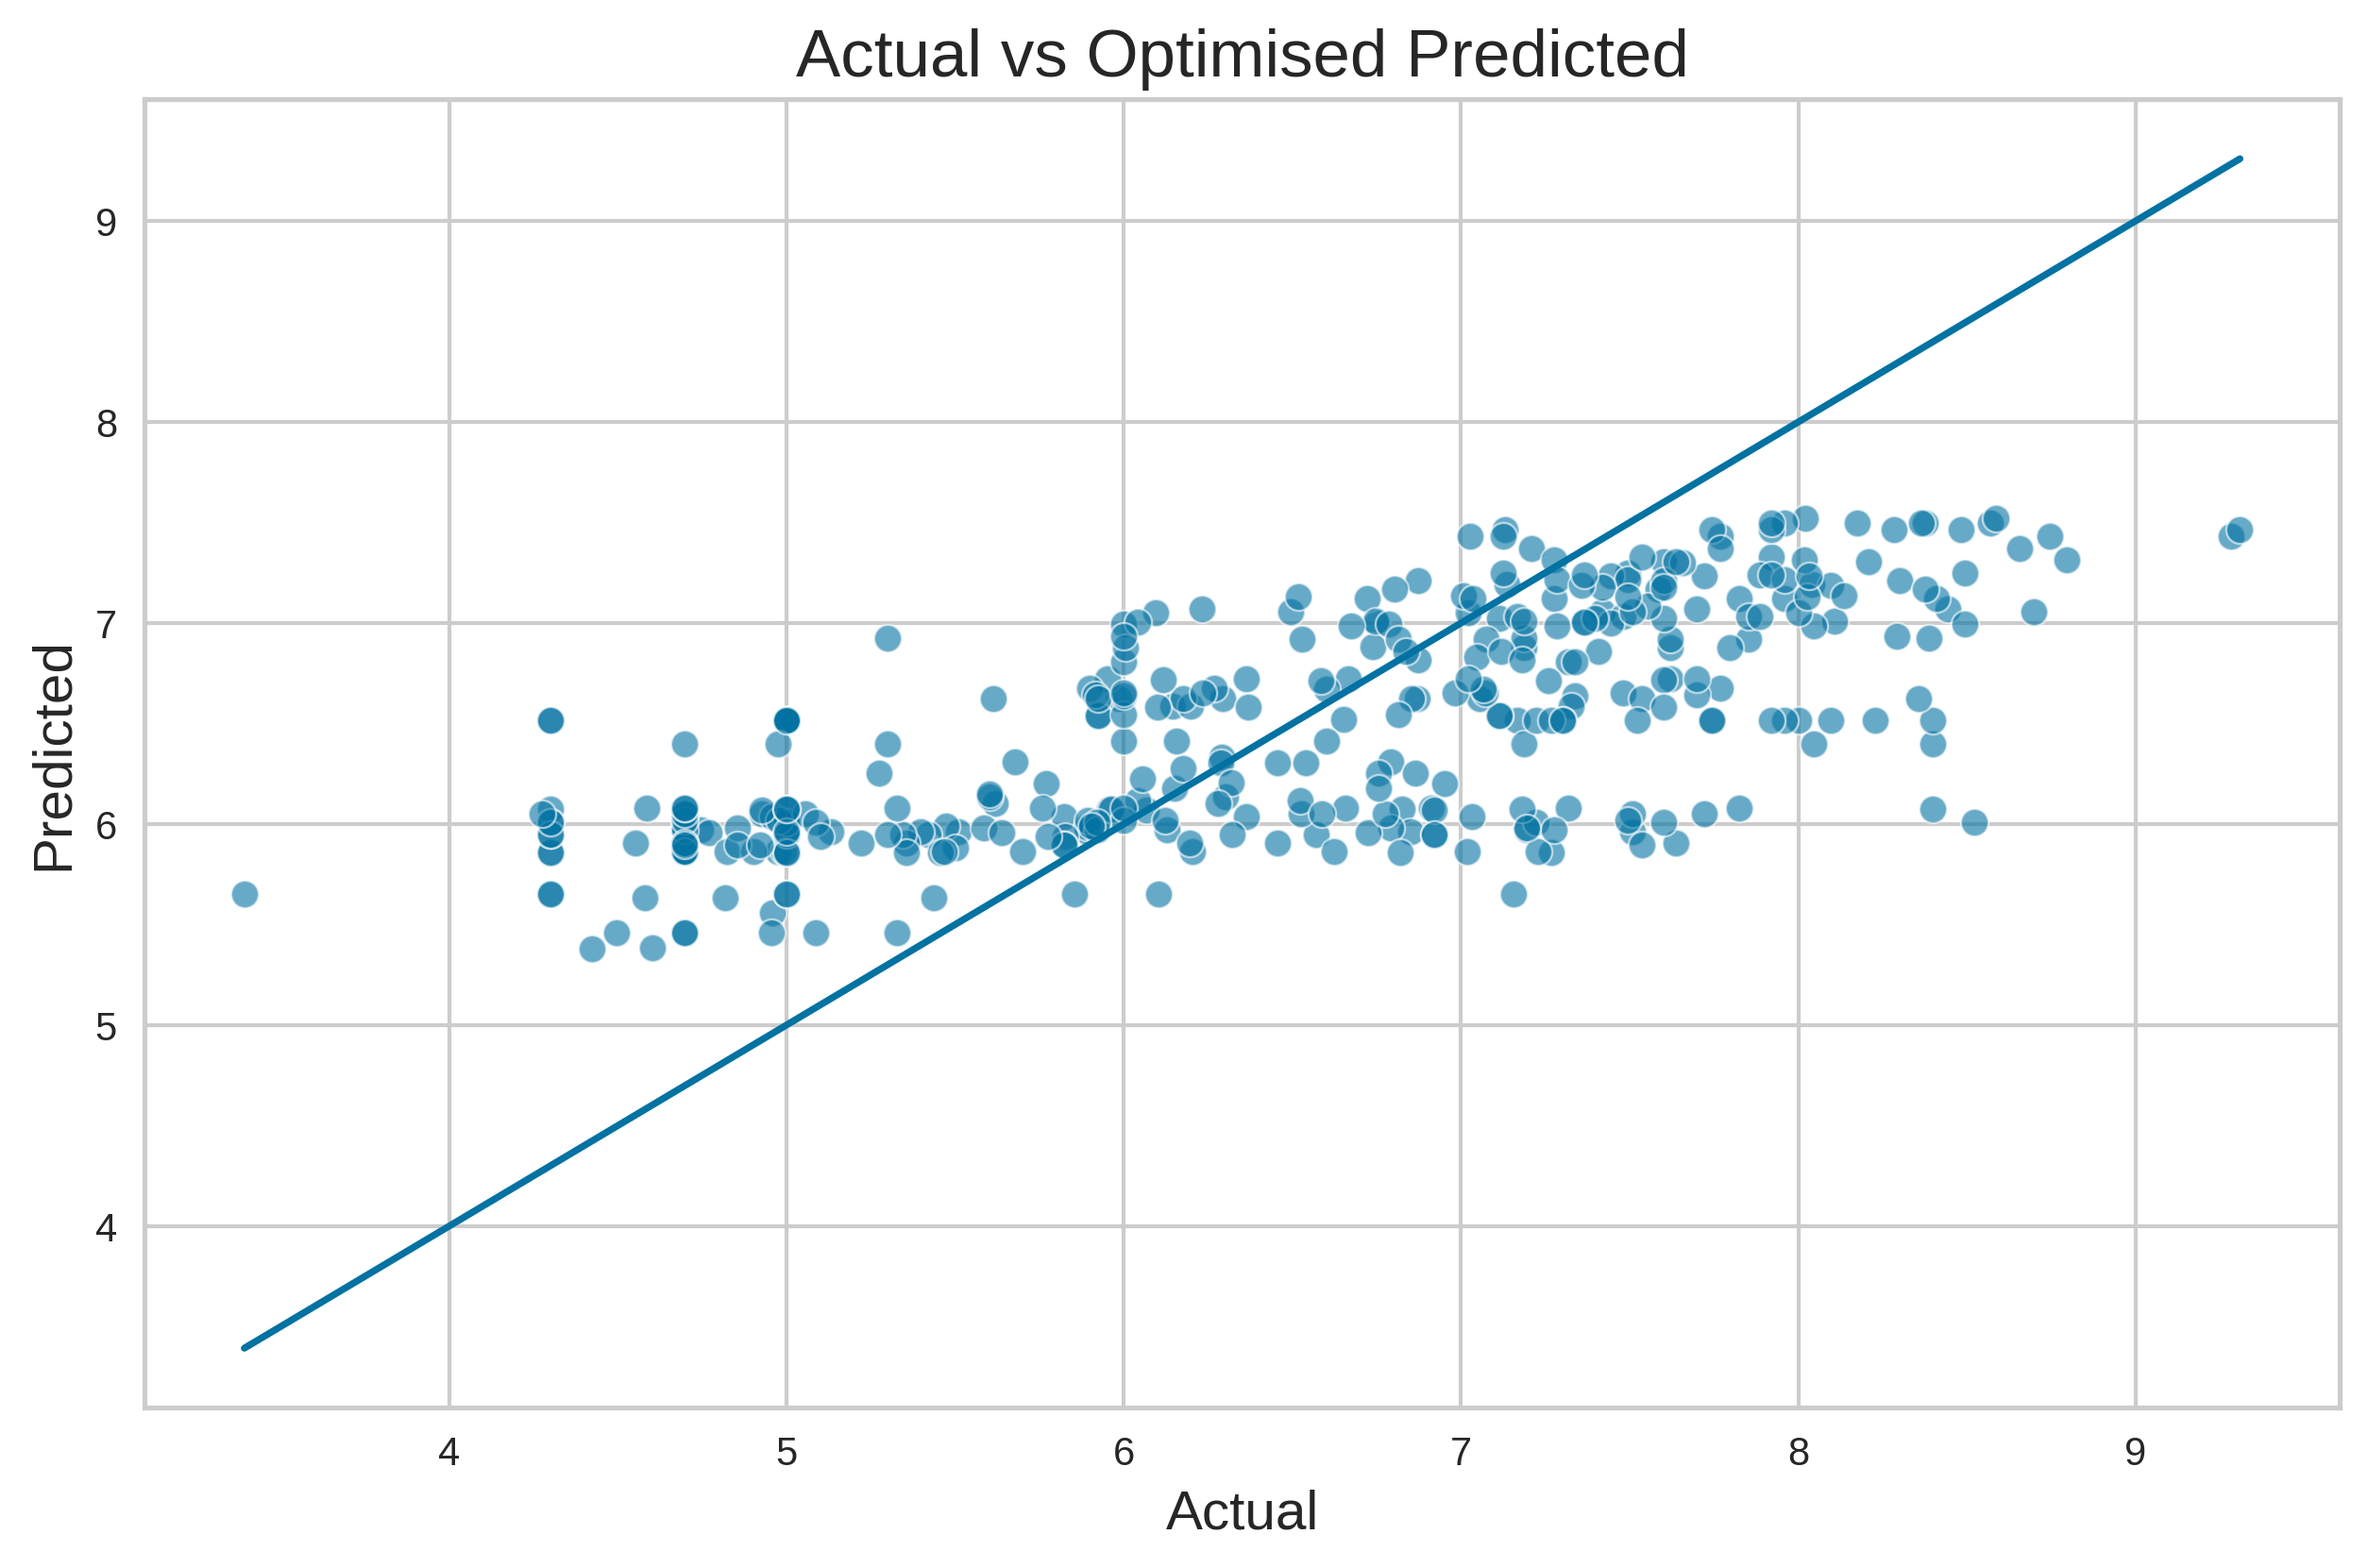

In [ ]:
plt.figure(dpi=300)
sns.scatterplot(x=Y_train, y=Y_train_optimised, alpha=0.6)
sns.lineplot(x=Y_train, y=Y_train)
plt.xlabel('Actual', fontsize = 14)
plt.ylabel('Predicted', fontsize = 14)
plt.title('Actual vs Optimised Predicted', fontsize = 17)
plt.savefig('scatterh_train_gbr.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
print('The training r_sq is: %.4f'% model.score(X_train, Y_train_optimised))

The training r_sq is: 0.6393


In [ ]:
print('The MAE is: %.4f'% mean_absolute_error(Y_train, Y_train_optimised))

The MAE is: 0.7744


In [ ]:
print('The RMSE is: %.4f'% np.sqrt(mean_squared_error(Y_train, Y_train_optimised)))

The RMSE is: 0.9278


In [ ]:
print('The EVS is: %.4f'% explained_variance_score(Y_train, Y_train_optimised))

The EVS is: 0.4318


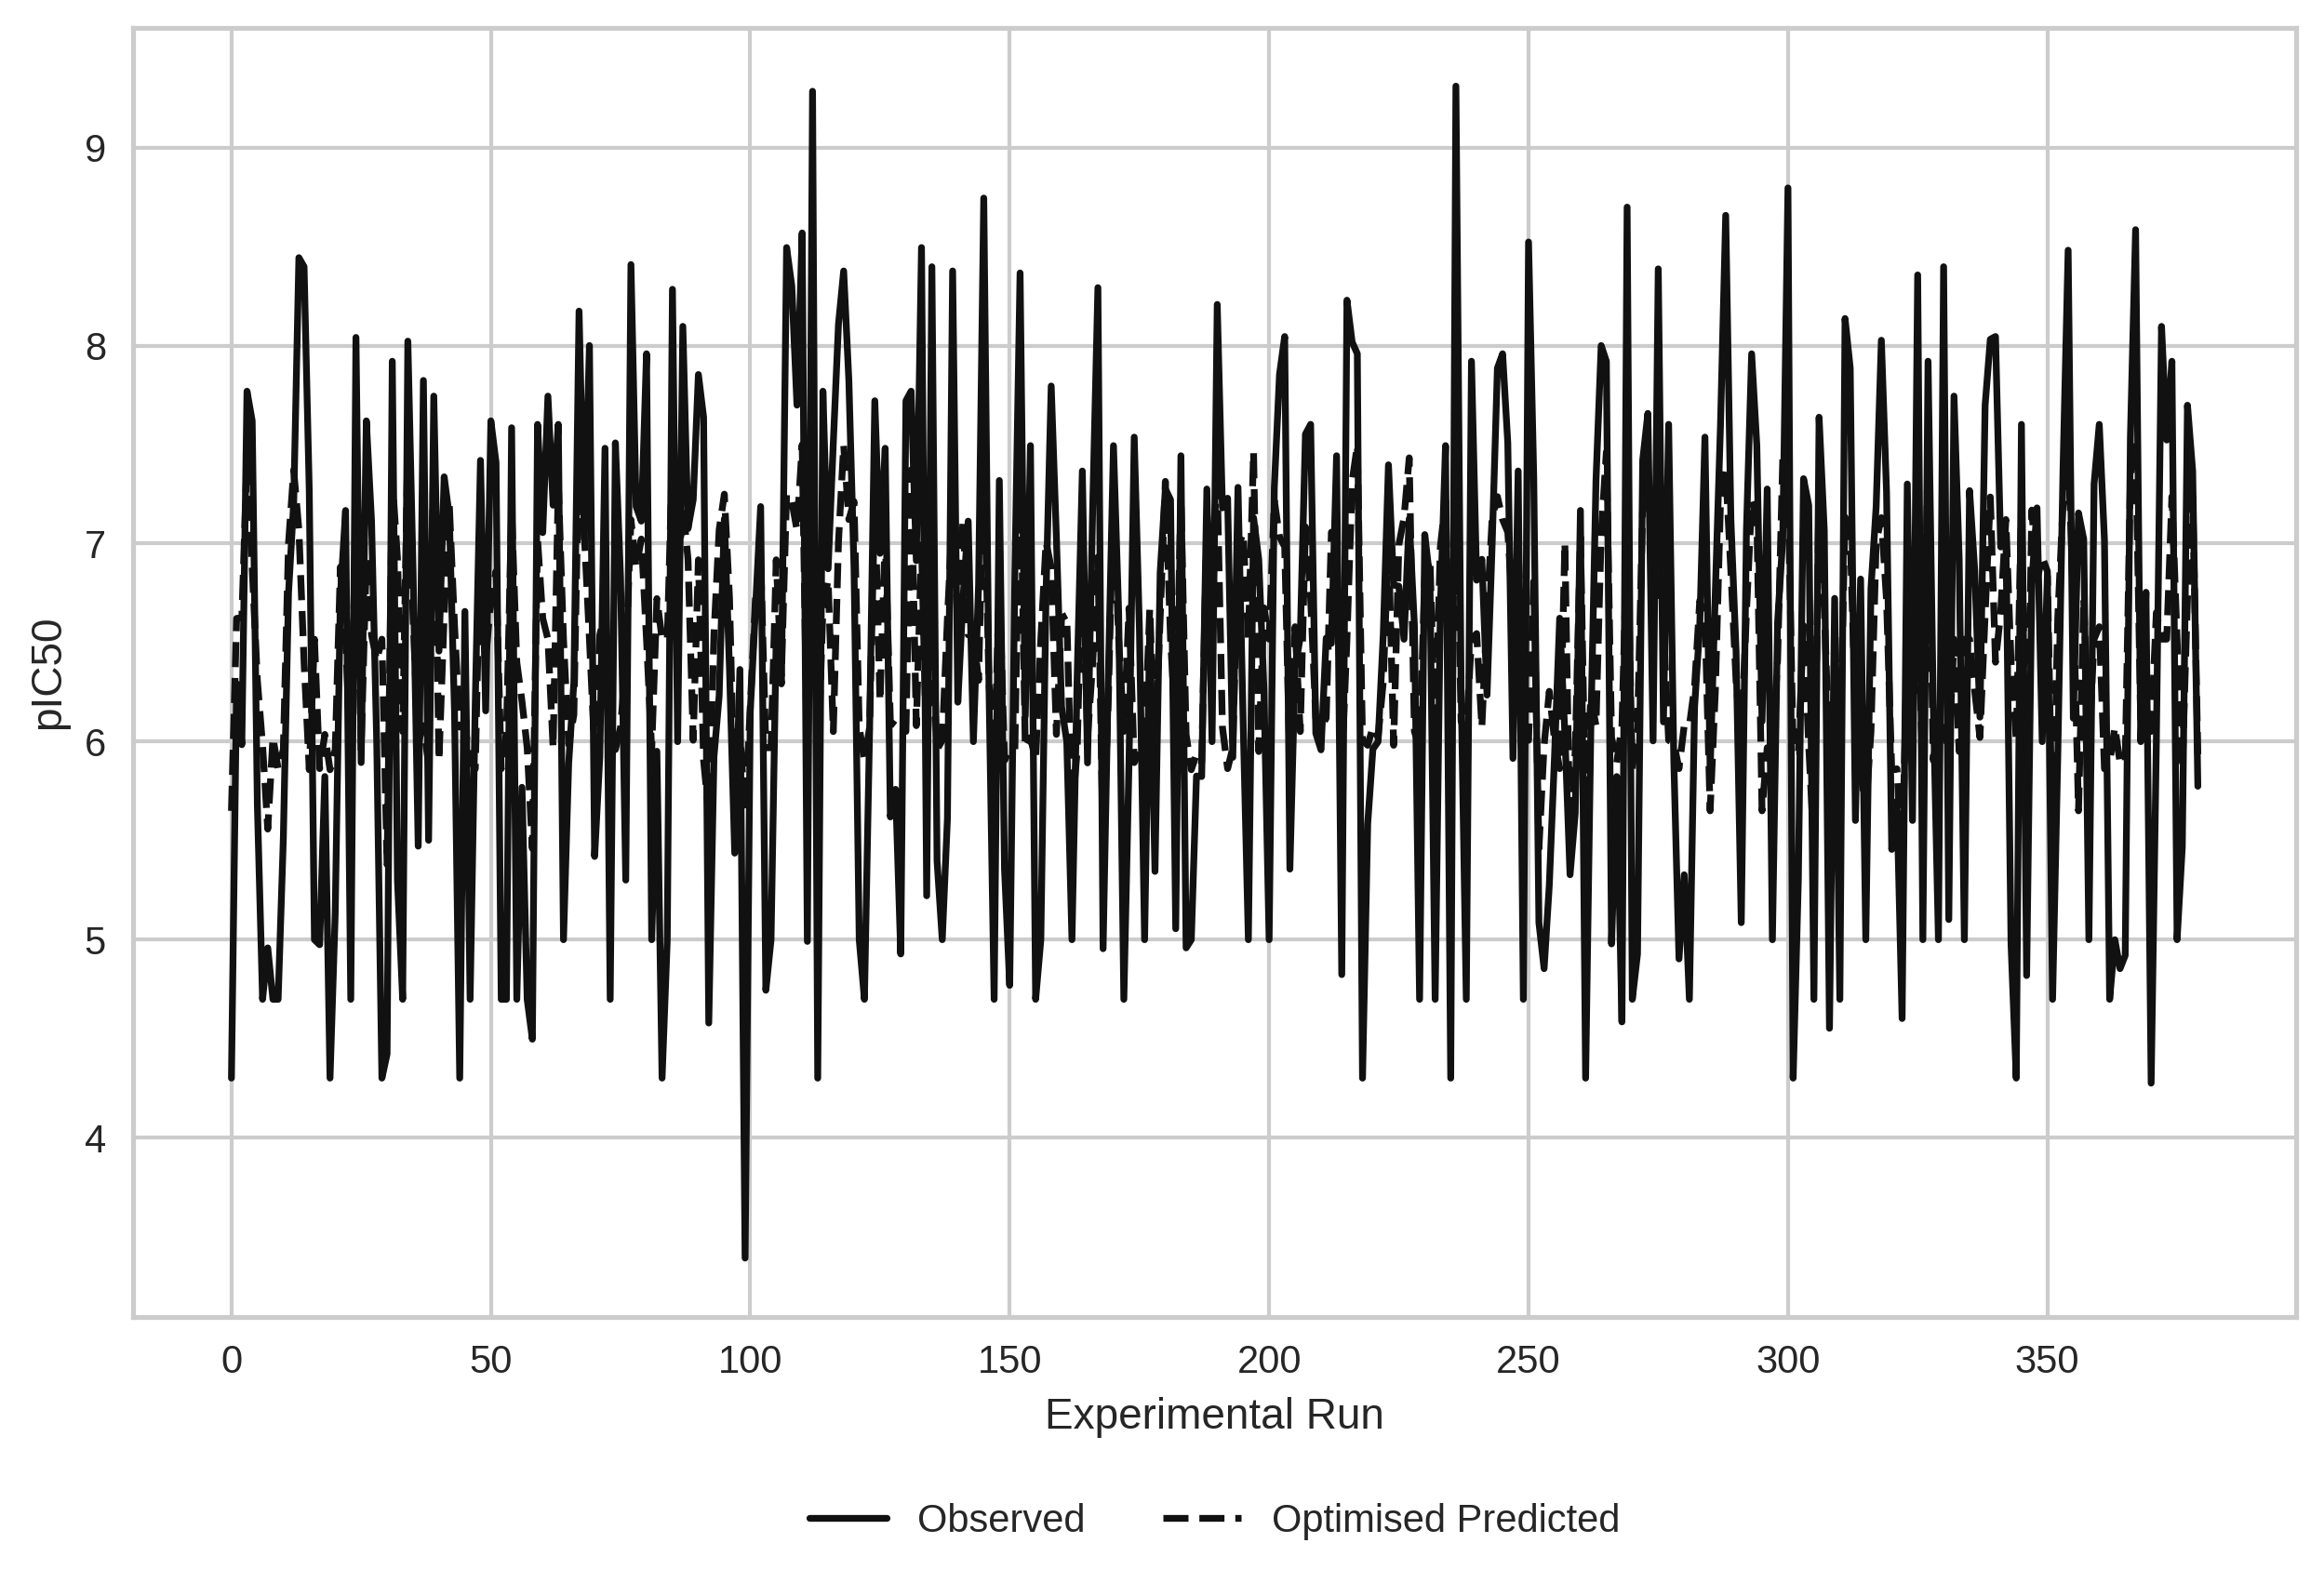

In [ ]:
plt.rcParams['figure.figsize'] = 10,6
plt.figure(dpi=300)
x_ax = range(len(X_train))
plt.plot(x_ax, Y_train, label = 'Observed', color = 'k', linestyle = '-')
plt.plot(x_ax, Y_train_optimised, label = 'Optimised Predicted', color = 'k', linestyle = '--')
plt.ylabel('pIC50')
plt.xlabel('Experimental Run')
plt.legend(bbox_to_anchor = (0.5, -0.2), loc = 'lower center', ncol = 2, frameon = False)
plt.savefig('OPH_train_gbr.png', dpi=300, bbox_inches='tight')

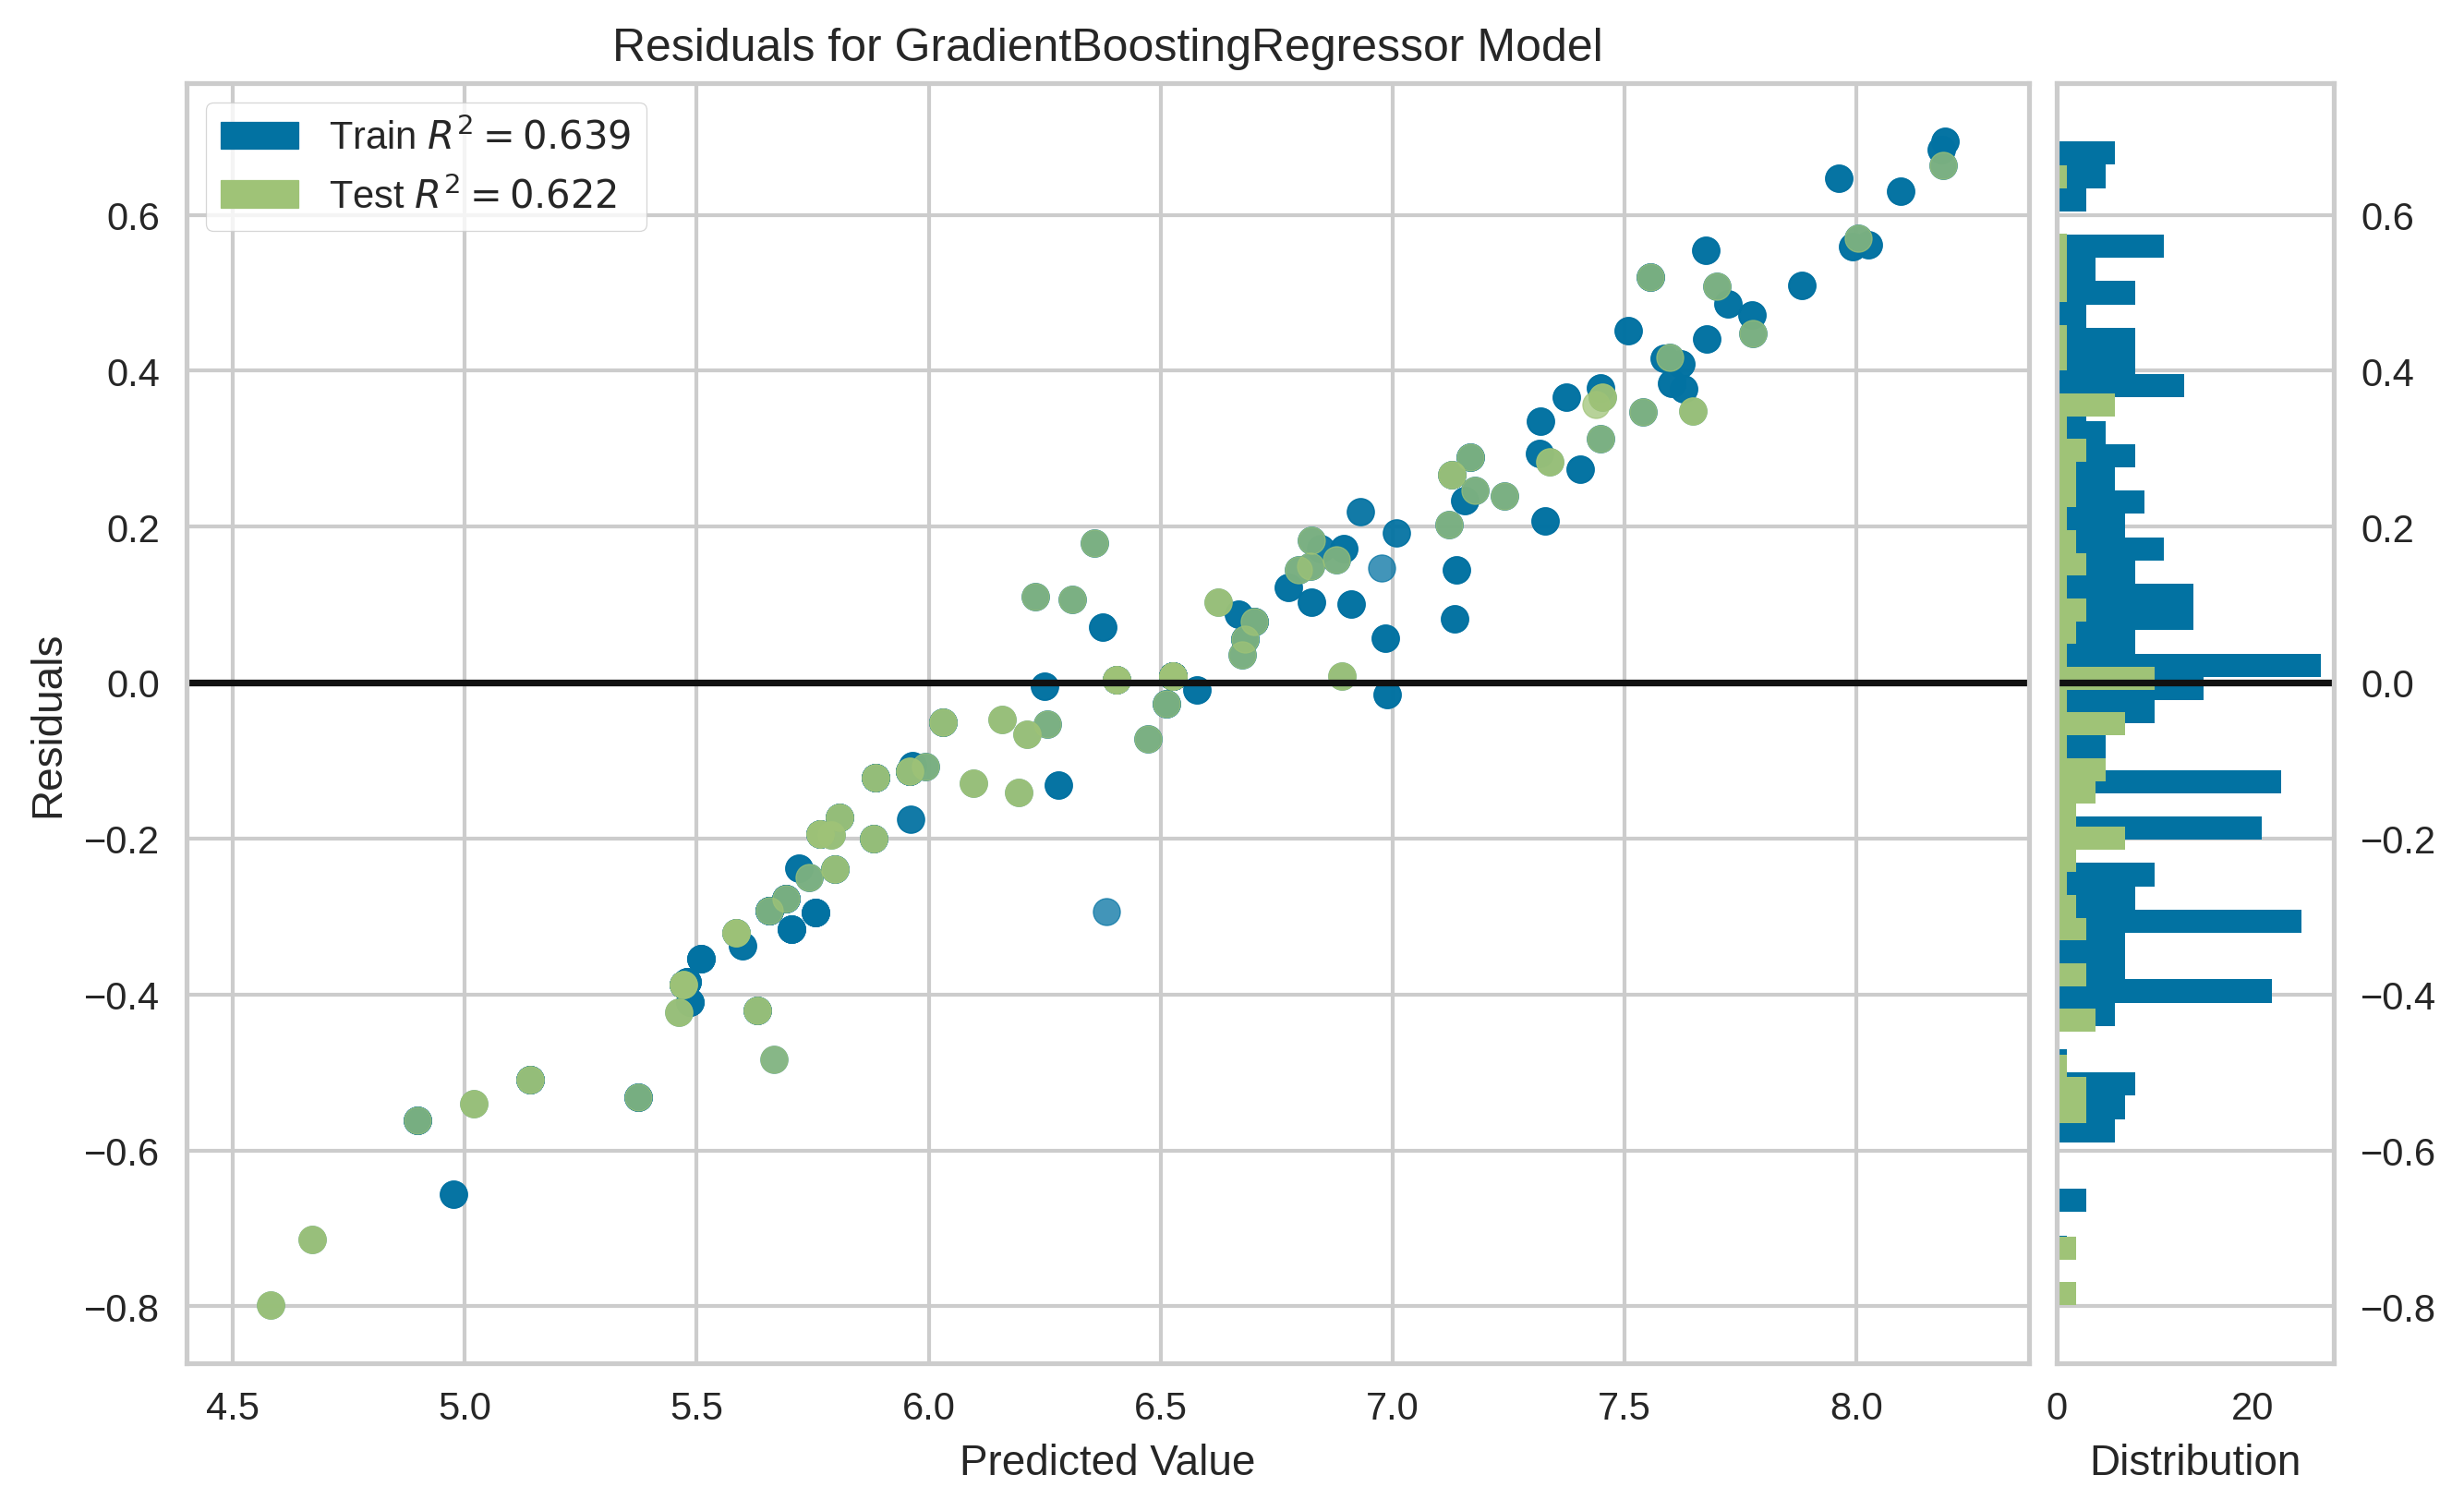

<Axes: title={'center': 'Residuals for GradientBoostingRegressor Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [ ]:
from yellowbrick.regressor import ResidualsPlot
plt.figure(dpi=300)
visualizer = ResidualsPlot(model)
visualizer.fit(X_train, Y_train_optimised)
visualizer.score(X_test, Y_test_optimised)
visualizer.ax.legend(loc='best')
plt.savefig('Residualsplot_H_gbr.png', dpi=300, bbox_inches='tight')
visualizer.poof()

In [ ]:
features = list(X_train.columns)

In [ ]:
features

['ATS7i',
 'AATS5m',
 'AATS4p',
 'AATS5p',
 'AATS3i',
 'AATS1s',
 'AATS5s',
 'ATSC7m',
 'ATSC1v',
 'ATSC7e',
 'ATSC5s',
 'AATSC0s',
 'AATSC6s',
 'MATS8c',
 'MATS3e',
 'MATS5i',
 'GATS3c',
 'GATS4m',
 'GATS3v',
 'GATS5e',
 'SpMAD_Dzp',
 'VR2_Dzs',
 'BCUTc-1l',
 'SpMax7_Bhm',
 'SpMax6_Bhv',
 'SpMin2_Bhv',
 'SpMin1_Bhe',
 'SpMax1_Bhp',
 'SpMin2_Bhs',
 'VCH-6',
 'VPC-5',
 'ASP-3',
 'ASP-4',
 'ASP-6',
 'ASP-7',
 'SHBd',
 'SHdsCH',
 'minHdsCH',
 'minsCH3',
 'mindssC',
 'maxHdsCH',
 'maxsCH3',
 'hmax',
 'MLFER_BO',
 'MLFER_S',
 'nTG12HeteroRing',
 'GGI6',
 'JGI4',
 'SRW8',
 'XLogP']

In [ ]:
GBR = GradientBoostingRegressor(random_state=seed, n_estimators = 100, max_features='sqrt', max_depth=10)

In [ ]:
GBR.fit(X_train, Y_train)

GradientBoostingRegressor(max_depth=10, max_features='sqrt', random_state=44)

In [ ]:
importance = GBR.feature_importances_
importance

array([0.00692305, 0.03784639, 0.00358837, 0.00626112, 0.00523277,
       0.00567416, 0.03169437, 0.00157547, 0.00722634, 0.00558629,
       0.00800916, 0.00548649, 0.00848975, 0.00733635, 0.00820025,
       0.00214445, 0.00446736, 0.0059197 , 0.02517944, 0.00308165,
       0.02034961, 0.00871428, 0.00910316, 0.00957925, 0.00394799,
       0.01645222, 0.02412191, 0.11885713, 0.00694669, 0.06468584,
       0.00265452, 0.0322584 , 0.03137057, 0.24909281, 0.0158237 ,
       0.00459713, 0.00256867, 0.01868516, 0.00217447, 0.00818362,
       0.01323975, 0.00103913, 0.00760156, 0.00719952, 0.00728305,
       0.060614  , 0.00349458, 0.00312064, 0.04907528, 0.00724243])

In [ ]:
FIM = pd.DataFrame({'features' : features, 'feature_importances' : importance})
FIM

features  feature_importances
0             ATS7i             0.006923
1            AATS5m             0.037846
2            AATS4p             0.003588
3            AATS5p             0.006261
4            AATS3i             0.005233
5            AATS1s             0.005674
6            AATS5s             0.031694
7            ATSC7m             0.001575
8            ATSC1v             0.007226
9            ATSC7e             0.005586
10           ATSC5s             0.008009
11          AATSC0s             0.005486
12          AATSC6s             0.008490
13           MATS8c             0.007336
14           MATS3e             0.008200
15           MATS5i             0.002144
16           GATS3c             0.004467
17           GATS4m             0.005920
18           GATS3v             0.025179
19           GATS5e             0.003082
20        SpMAD_Dzp             0.020350
21          VR2_Dzs             0.008714
22         BCUTc-1l             0.009103
23       SpMax7_Bhm             0.009579
24       SpMax6_Bhv             0.003948
25       SpMin2_Bhv             0.016452
26       SpMin1_Bhe             0.024122
27       SpMax1_Bhp             0.118857
28       SpMin2_Bhs             0.006947
29            VCH-6             0.064686
30            VPC-5             0.002655
31            ASP-3             0.032258
32            ASP-4             0.031371
33            ASP-6             0.249093
34            ASP-7             0.015824
35             SHBd             0.004597
36           SHdsCH             0.002569
37         minHdsCH             0.018685
38          minsCH3             0.002174
39          mindssC             0.008184
40         maxHdsCH             0.013240
41          maxsCH3             0.001039
42             hmax             0.007602
43         MLFER_BO             0.007200
44          MLFER_S             0.007283
45  nTG12HeteroRing             0.060614
46             GGI6             0.003495
47             JGI4             0.003121
48             SRW8             0.049075
49            XLogP             0.007242

<Figure size 8000x4800 with 0 Axes>

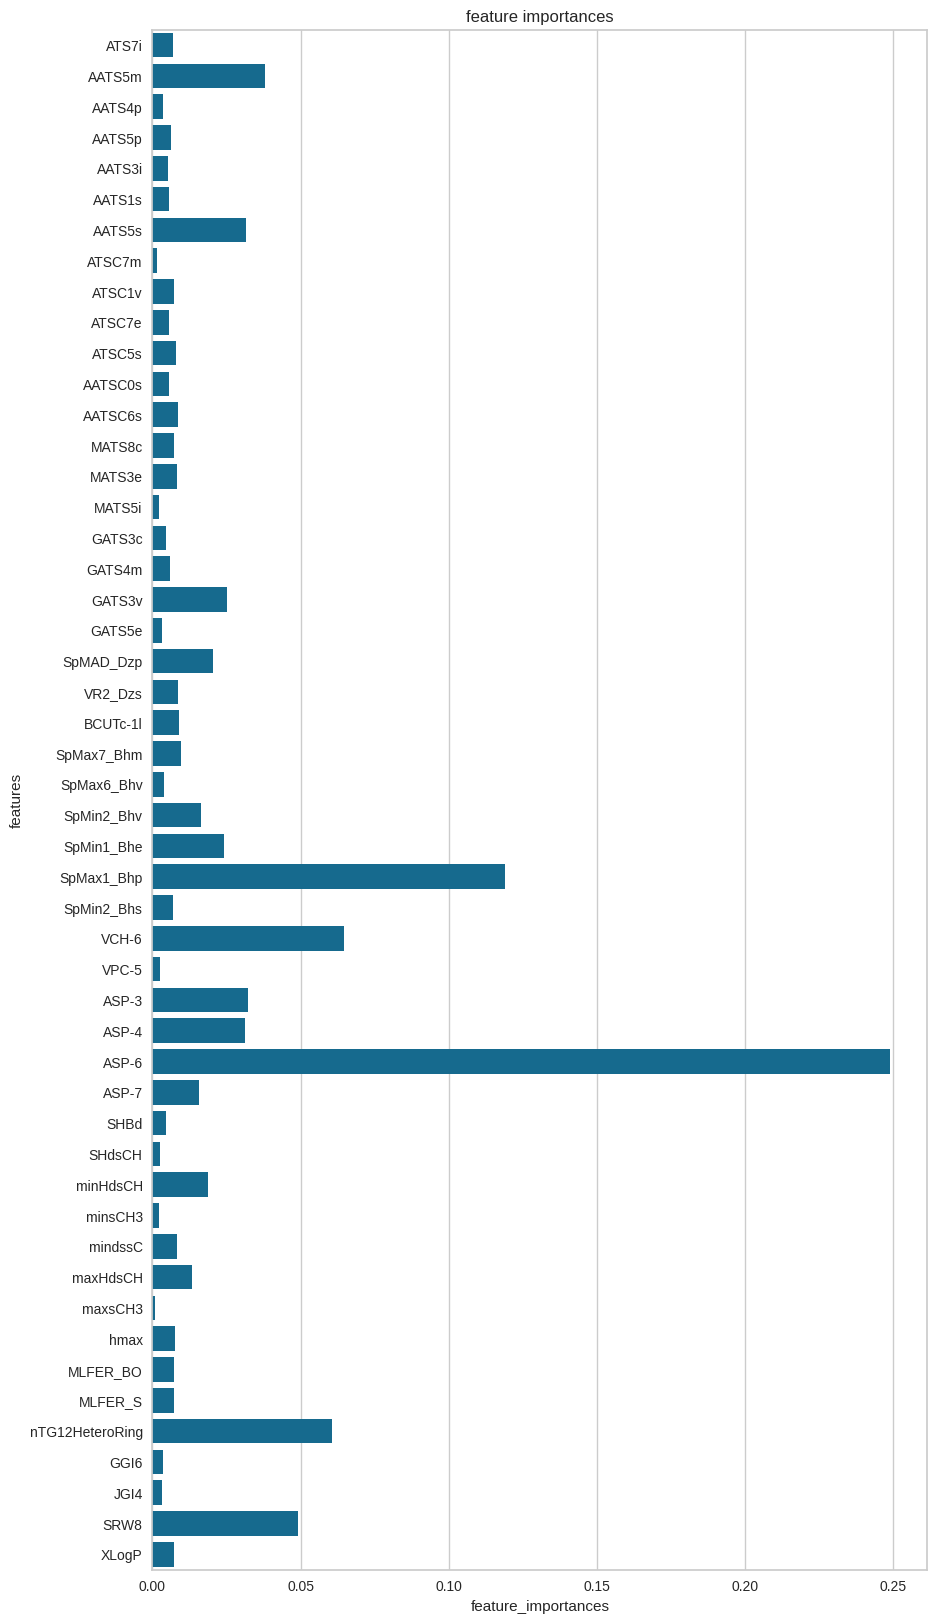

In [ ]:
fig = plt.figure(dpi=800)
plt.figure(figsize=(10,20))
plt.title('feature importances')
sns.barplot(y='features', x='feature_importances', data=FIM)
plt.savefig('fimp_gbr.png', bbox_inches='tight')
plt.show()

In [ ]:
!pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 538.2/538.2 kB 8.8 MB/s eta 0:00:00


In [ ]:
import shap
X = df2.drop(['pIC50'],axis = 1)
explainer = shap.TreeExplainer(model,feature_perturbation="tree_path_dependent")
shap_values = explainer.shap_values(X)

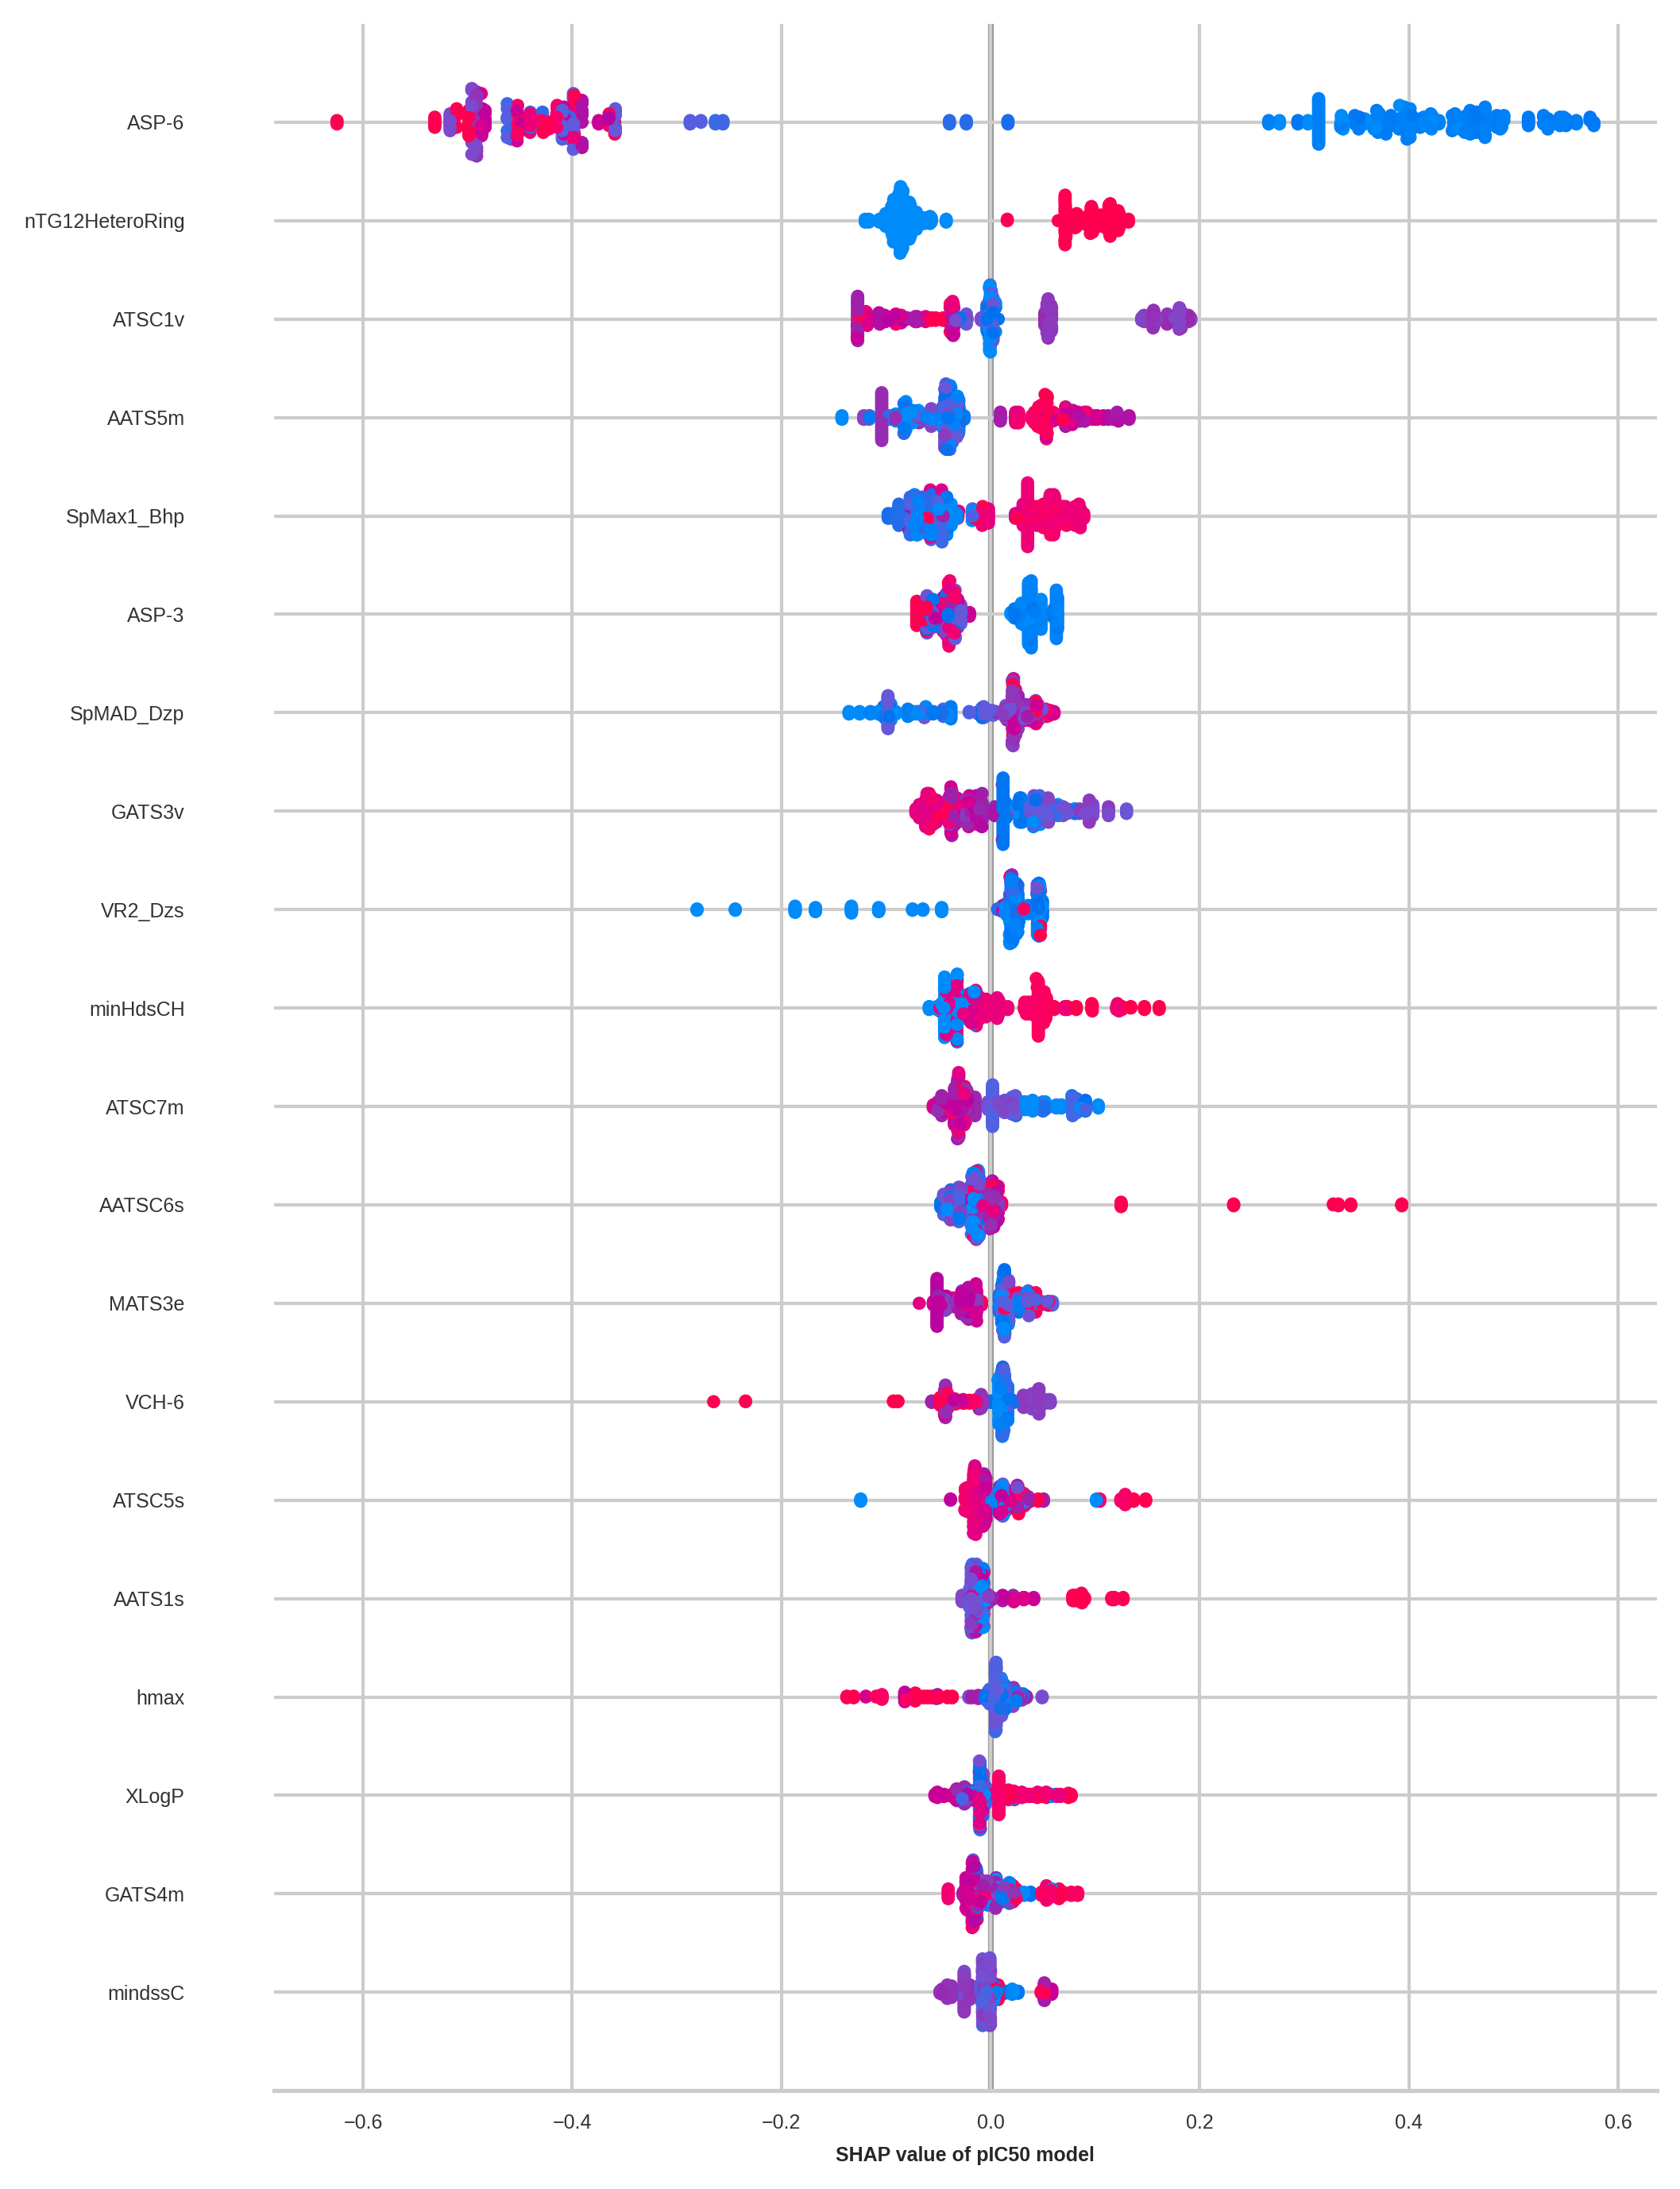

In [ ]:
plt.figure(dpi=300)
shap.summary_plot(shap_values, X,show=False,color_bar=False)
plt.xlabel("SHAP value of pIC50 model" ,fontweight='bold',fontsize=6)
plt.tick_params(labelsize=6,)
plt.savefig('shap_gbr.png', bbox_inches='tight')

plt.show()

In [ ]:
mv /content/*.png /content/drive/MyDrive/Subarna_paper/gbr